#Project Defintion

When running a business, the customer is the most valuable asset. Modern businesses generate numerous amounts of data about their customers but this data isn’t useful until transformed into meaningful information that helps the decision maker to act on and drive knowledge about their business. Business information is usually called business metrics of key performance indicators (KPIs). One of the most important and valuable business metrics is customer lifetime value (CLV). The CLV indicates how useful the individual customer is to the business, it takes into account many factors to calculate the value (mostly the revenue) generated to the business by the customer.


CLV is very helpful and informative for the business when running a marketing campiness, knowing the most valuable customers and working on keeping them alive for the business is a key success step. When knowing the CLV a business can utilize it to make customers person for the most valuable customers and focus on acquiring this segment of customers. On the other hand, the business can manage to classify the less valuable customers to avoid spending less money on acquiring them. Also, the CLV can be very informative when pivoting it with different business elements such as business offers, it can show the effective offers from the less effective ones.


Predicting the CLV makes it more robust for the business to manage its customer’s base and enhance its processes. There are many different approaches to calculate and predict the CLV, in this project we encountered 5 methods which are: Historical, Probabilistic BG/NBD, Machine Learning Regression using XGBoost, Liner Deep Learning Regression, and Machine Learning Segmentation and Classification. For the business to be able to utilize these methods it needs to perform data pre-processing and data preparation to make the data ready for modeling.
In the project we queried the data from a business database, pre-processed it, understand it throw EDA, processed and prepared it, then we modeled and evaluated it.


#Data Accusation

1. Download the database backup file from Microsoft website.
https://learn.microsoft.com/en-us/sql/samples/adventureworks-install-configure?view=sql-server-ver16&tabs=ssms
2. Restoring the 'AdventureWorks2019.bak' file using SQL Server Managment Studio localy

##3. Query the data using SQL Server Managment or Azure Data Studio
The details are in the report.

In [16]:
SQL = '''
 SELECT TOP (200000) [AdventureWorks2019].[Sales].[SalesOrderHeader].[CustomerID]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[SalesOrderID]
      ,[AdventureWorks2019].[Sales].[SalesOrderDetail].[OrderQty]
      ,[AdventureWorks2019].[Sales].[SalesOrderDetail].[ProductID]
      ,[AdventureWorks2019].[Sales].[SalesOrderDetail].[SpecialOfferID]
      ,[AdventureWorks2019].[Sales].[SalesOrderDetail].[UnitPrice]
      ,[AdventureWorks2019].[Sales].[SalesOrderDetail].[UnitPriceDiscount]
      ,[AdventureWorks2019].[Sales].[SalesOrderDetail].[LineTotal]
	  ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[RevisionNumber]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[OrderDate]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[Status]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[OnlineOrderFlag]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[SalesOrderNumber]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[PurchaseOrderNumber]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[AccountNumber]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[SalesPersonID]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[TerritoryID]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[BillToAddressID]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[ShipToAddressID]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[ShipMethodID]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[CreditCardID]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[CurrencyRateID]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[SubTotal]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[TaxAmt]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[Freight]
      ,[AdventureWorks2019].[Sales].[SalesOrderHeader].[TotalDue]
  FROM [AdventureWorks2019].[Sales].[SalesOrderHeader], [AdventureWorks2019].[Sales].[SalesOrderDetail]
  WHERE [AdventureWorks2019].[Sales].[SalesOrderHeader].[SalesOrderID] = [AdventureWorks2019].[Sales].[SalesOrderDetail].[SalesOrderID]
'''

##4. Exporting the data to a .csv file
The details are in the report.

##5. Reading the dataset

In [17]:
import pandas as pd

df = pd.read_excel('/content/clv_dataset.xls')

print(f'Our dataset shape is {df.shape}')

Our dataset shape is (121317, 26)


In [18]:
df.head()

CustomerID  SalesOrderID  OrderQty  ProductID  SpecialOfferID  UnitPrice  \
0       29825         43659         1        776               1   2024.994   
1       29825         43659         3        777               1   2024.994   
2       29825         43659         1        778               1   2024.994   
3       29825         43659         1        771               1   2039.994   
4       29825         43659         1        772               1   2039.994   

   UnitPriceDiscount  LineTotal  RevisionNumber            OrderDate  ...  \
0                0.0   2024.994               8  2011-05-31 00:00:00  ...   
1                0.0   6074.982               8  2011-05-31 00:00:00  ...   
2                0.0   2024.994               8  2011-05-31 00:00:00  ...   
3                0.0   2039.994               8  2011-05-31 00:00:00  ...   
4                0.0   2039.994               8  2011-05-31 00:00:00  ...   

   TerritoryID  BillToAddressID ShipToAddressID ShipMethodID CreditCardID  \
0            5              985             985            5      16281.0   
1            5              985             985            5      16281.0   
2            5              985             985            5      16281.0   
3            5              985             985            5      16281.0   
4            5              985             985            5      16281.0   

   CurrencyRateID    SubTotal     TaxAmt   Freight    TotalDue  
0             NaN  20565.6206  1971.5149  616.0984  23153.2339  
1             NaN  20565.6206  1971.5149  616.0984  23153.2339  
2             NaN  20565.6206  1971.5149  616.0984  23153.2339  
3             NaN  20565.6206  1971.5149  616.0984  23153.2339  
4             NaN  20565.6206  1971.5149  616.0984  23153.2339  

[5 rows x 26 columns]

In [19]:
#Copying original df
original_df = df.copy()

#Data Pre-Processing

###Features Selection

In [20]:
original_df.columns

Index(['CustomerID', 'SalesOrderID', 'OrderQty', 'ProductID', 'SpecialOfferID',
       'UnitPrice', 'UnitPriceDiscount', 'LineTotal', 'RevisionNumber',
       'OrderDate', 'Status', 'OnlineOrderFlag', 'SalesOrderNumber',
       'PurchaseOrderNumber', 'AccountNumber', 'SalesPersonID', 'TerritoryID',
       'BillToAddressID', 'ShipToAddressID', 'ShipMethodID', 'CreditCardID',
       'CurrencyRateID', 'SubTotal', 'TaxAmt', 'Freight', 'TotalDue'],
      dtype='object')

In [21]:
#We are intersted on the colomns 'CustomerID', 'SalesOrderID', 'OrderDate', 'OrderQty', and 'LineTotal'.
df = original_df[['CustomerID', 'SalesOrderID', 'ProductID', 'SpecialOfferID', 'OrderDate', 'OrderQty', 'LineTotal']]
df

CustomerID  SalesOrderID  ProductID  SpecialOfferID  \
0            29825         43659        776               1   
1            29825         43659        777               1   
2            29825         43659        778               1   
3            29825         43659        771               1   
4            29825         43659        772               1   
...            ...           ...        ...             ...   
121312       15868         75122        878               1   
121313       15868         75122        712               1   
121314       18759         75123        878               1   
121315       18759         75123        879               1   
121316       18759         75123        712               1   

                  OrderDate  OrderQty  LineTotal  
0       2011-05-31 00:00:00         1   2024.994  
1       2011-05-31 00:00:00         3   6074.982  
2       2011-05-31 00:00:00         1   2024.994  
3       2011-05-31 00:00:00         1   2039.994  
4       2011-05-31 00:00:00         1   2039.994  
...                     ...       ...        ...  
121312  2014-06-30 00:00:00         1     21.980  
121313  2014-06-30 00:00:00         1      8.990  
121314  2014-06-30 00:00:00         1     21.980  
121315  2014-06-30 00:00:00         1    159.000  
121316  2014-06-30 00:00:00         1      8.990  

[121317 rows x 7 columns]

###Data Cleaning: Missing Values


In [22]:
print(f"Percentage of missing values in df columns:\n{df.isnull().mean()*100}")

Percentage of missing values in df columns:
CustomerID        0.0
SalesOrderID      0.0
ProductID         0.0
SpecialOfferID    0.0
OrderDate         0.0
OrderQty          0.0
LineTotal         0.0
dtype: float64


No missing values to deal with.

###Data Formating and structuring: Data Types

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121317 entries, 0 to 121316
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CustomerID      121317 non-null  int64  
 1   SalesOrderID    121317 non-null  int64  
 2   ProductID       121317 non-null  int64  
 3   SpecialOfferID  121317 non-null  int64  
 4   OrderDate       121317 non-null  object 
 5   OrderQty        121317 non-null  int64  
 6   LineTotal       121317 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 6.5+ MB


In [ ]:
#Transforming OrderDate column to date format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [25]:
df.OrderDate.head()

0   2011-05-31
1   2011-05-31
2   2011-05-31
3   2011-05-31
4   2011-05-31
Name: OrderDate, dtype: datetime64[ns]

OrderDate data type corrected sucsesfully.

###Data Validation: Data Integrity

In [26]:
def data_validation(column):
  print(df[column].value_counts())
  print(f"Number of unique values: {df[column].nunique(dropna=False)}")
  print(f"Minimun value: {df[column].min()}")
  print(f"Maximum value: {df[column].max()}")
data_validation(df.columns[0])

CustomerID
29722    530
29966    482
29614    451
29950    446
30048    441
        ... 
26855      1
25476      1
23935      1
18017      1
27205      1
Name: count, Length: 19119, dtype: int64
Number of unique values: 19119
Minimun value: 11000
Maximum value: 30118


In [27]:
data_validation(df.columns[1])

SalesOrderID
51721    72
51739    72
53465    71
51160    71
47355    68
         ..
64020     1
46465     1
46464     1
46463     1
46852     1
Name: count, Length: 31465, dtype: int64
Number of unique values: 31465
Minimun value: 43659
Maximum value: 75123


In [28]:
data_validation(df.columns[2])

ProductID
870    4688
712    3382
873    3354
921    3095
711    3090
       ... 
927       9
911       6
943       6
942       5
897       2
Name: count, Length: 266, dtype: int64
Number of unique values: 266
Minimun value: 707
Maximum value: 999


In [29]:
data_validation(df.columns[3])

SpecialOfferID
1     115884
2       3428
3        606
13       524
14       244
16       169
7        137
8         98
11        84
4         80
9         61
5          2
Name: count, dtype: int64
Number of unique values: 12
Minimun value: 1
Maximum value: 16


In [30]:
data_validation(df.columns[4])

OrderDate
2013-06-30    3876
2013-07-31    3852
2013-10-30    3202
2014-05-01    3126
2014-03-31    3065
              ... 
2012-01-21       1
2011-09-24       1
2012-10-03       1
2011-08-29       1
2012-04-27       1
Name: count, Length: 1124, dtype: int64
Number of unique values: 1124
Minimun value: 2011-05-31 00:00:00
Maximum value: 2014-06-30 00:00:00


In [31]:
data_validation(df.columns[5])

OrderQty
1     74954
2     14200
3     10058
4      7494
5      4386
6      3298
7      1735
8      1521
9       837
10      768
12      466
11      392
14      265
13      230
16      133
15      119
18      101
17       94
19       53
20       46
21       31
23       23
24       19
25       17
26       15
22       12
27        9
32        7
33        6
28        6
31        5
34        3
29        3
35        2
36        2
40        2
39        1
44        1
30        1
38        1
41        1
Name: count, dtype: int64
Number of unique values: 41
Minimun value: 1
Maximum value: 44


In [32]:
data_validation(df.columns[6])

LineTotal
4.990000       8827
34.990000      6440
8.990000       4470
2.290000       3191
3.990000       2376
               ... 
914.400000        1
7418.091772       1
1376.940000       1
89.437500         1
5078.605950       1
Name: count, Length: 1488, dtype: int64
Number of unique values: 1488
Minimun value: 1.374
Maximum value: 27893.619


###Outliers Detection

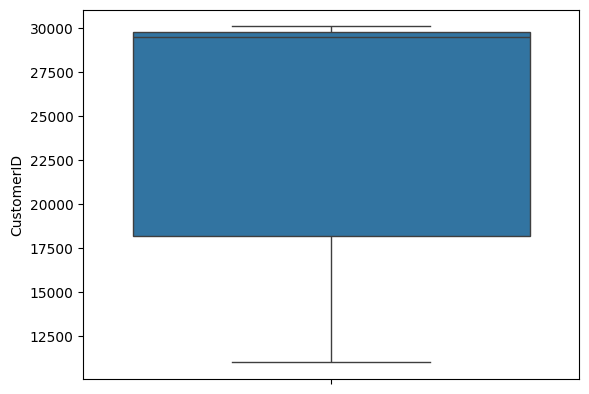


Upper_Whisker :  47222.0
Lower Whisker :  750.0
Number of outlaiers in the column CustomerID is 0

No outliers in column 'CustomerID'


In [33]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def CalculateOutliers(n):
  columns = df.columns
  sns.boxplot(df[columns[n]])
  plt.show()
  Q3 = np.quantile(df[columns[n]], 0.75)
  Q1 = np.quantile(df[columns[n]], 0.25)
  IQR = Q3 - Q1
  Lower_Whisker = Q1 - (1.5*IQR)
  Upper_Whisker = Q3 + (1.5*IQR)
  print('\nUpper_Whisker : ', Upper_Whisker)
  print('Lower Whisker : ', Lower_Whisker)
  #Checking the number of the outliers
  num_out = df[(df[columns[n]] < Lower_Whisker) | (df[columns[n]] > Upper_Whisker)][columns[n]].count()
  print(f'Number of outlaiers in the column {columns[n]} is {num_out}')
  if num_out == 0:
    print(f"\nNo outliers in column '{columns[n]}'")
  else:
    print(f"\n {num_out} Outliers exist in column '{columns[n]}'")
CalculateOutliers(0)

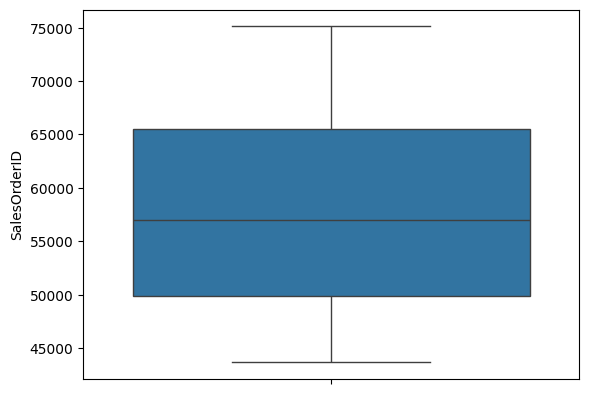


Upper_Whisker :  88899.0
Lower Whisker :  26475.0
Number of outlaiers in the column SalesOrderID is 0

No outliers in column 'SalesOrderID'


In [34]:
CalculateOutliers(1)

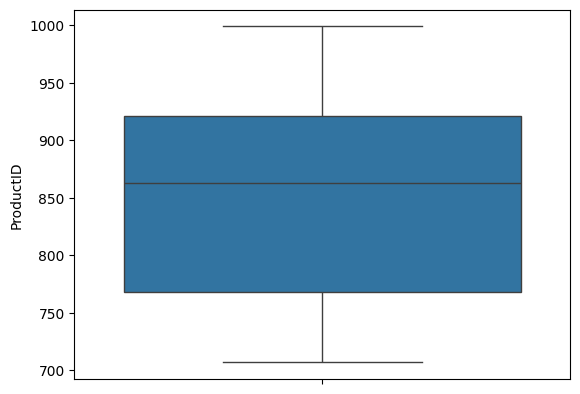


Upper_Whisker :  1150.5
Lower Whisker :  538.5
Number of outlaiers in the column ProductID is 0

No outliers in column 'ProductID'


In [35]:
CalculateOutliers(2)

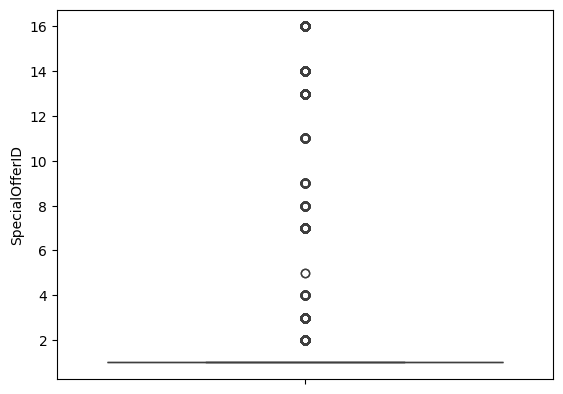


Upper_Whisker :  1.0
Lower Whisker :  1.0
Number of outlaiers in the column SpecialOfferID is 5433

 5433 Outliers exist in column 'SpecialOfferID'


In [36]:
CalculateOutliers(3)

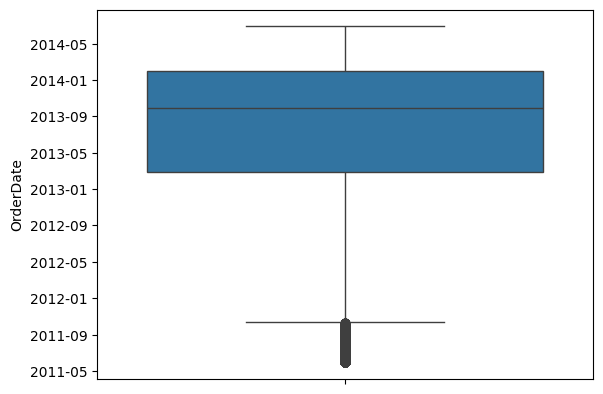


Upper_Whisker :  2015-06-20T12:00:00.000000000
Lower Whisker :  2011-10-11T12:00:00.000000000
Number of outlaiers in the column OrderDate is 4009

 4009 Outliers exist in column 'OrderDate'


In [37]:
CalculateOutliers(4)

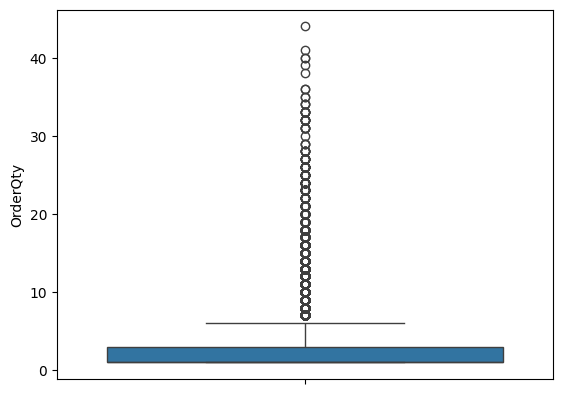


Upper_Whisker :  6.0
Lower Whisker :  -2.0
Number of outlaiers in the column OrderQty is 6927

 6927 Outliers exist in column 'OrderQty'


In [38]:
CalculateOutliers(5)

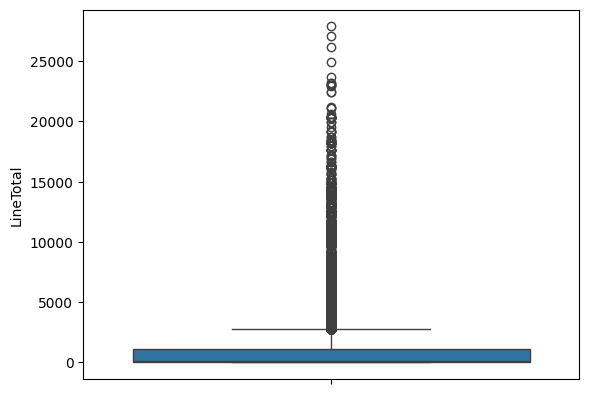


Upper_Whisker :  2763.74
Lower Whisker :  -1618.26
Number of outlaiers in the column LineTotal is 10737

 10737 Outliers exist in column 'LineTotal'


In [39]:
CalculateOutliers(6)

#Data Analysis

##Data Distrbution

Since all our features data are numirical features we will use the histogram to plot the distribution of our features data.

### Histogram: distribution of numerical columns

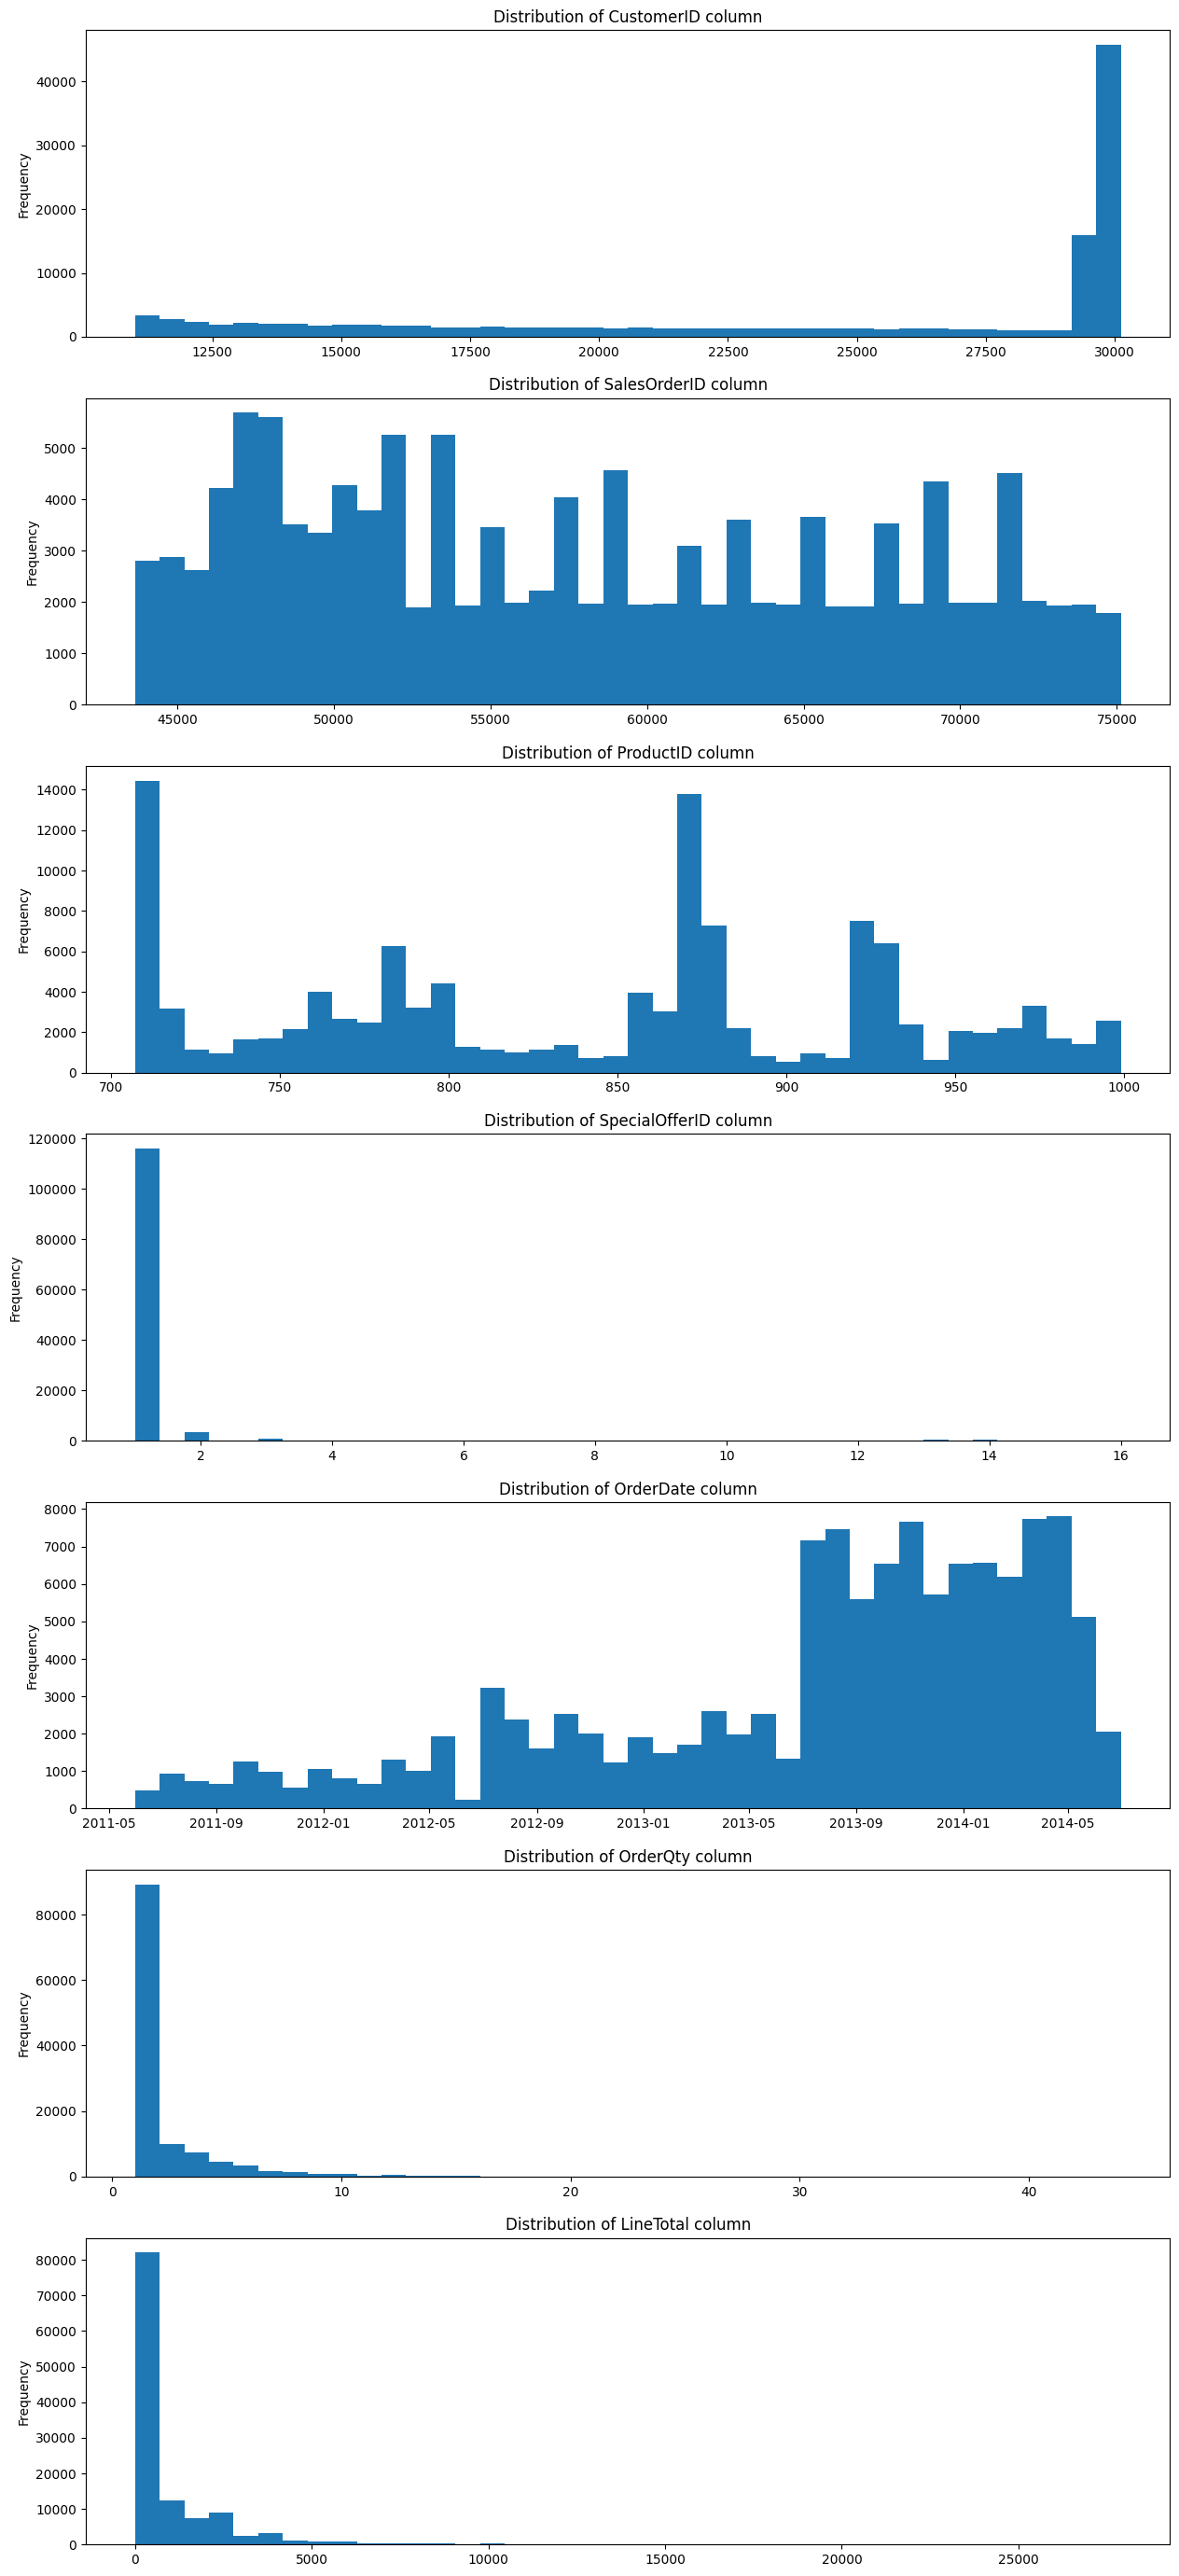

In [ ]:
fig, axes = plt.subplots(df.shape[1], 1, figsize= (15, df.shape[1]*5))
axes = axes.flatten()
for i, column in enumerate(df.columns):
  axes[i].hist(df[column],bins=40)
  axes[i].set_title(f"Distribution of {column} column")
  axes[i].set_ylabel('Frequency')

We can interpret that the ‘OrderQty’ and the ‘LineTotal’ columns are right-skewed. We can also say that the ‘OrderDate’ is left skewed, and the rest of the columns don’t follow any distribution pattern.

##Correlation Analysis: Pair plot (Scatter plot)

In [ ]:
df.columns

Index(['CustomerID', 'SalesOrderID', 'ProductID', 'SpecialOfferID',
       'OrderDate', 'OrderQty', 'LineTotal'],
      dtype='object')

In [ ]:
#Dropping non-informative ID columns
df_pair_plot = df[['ProductID','SpecialOfferID','OrderDate', 'OrderQty', 'LineTotal']]

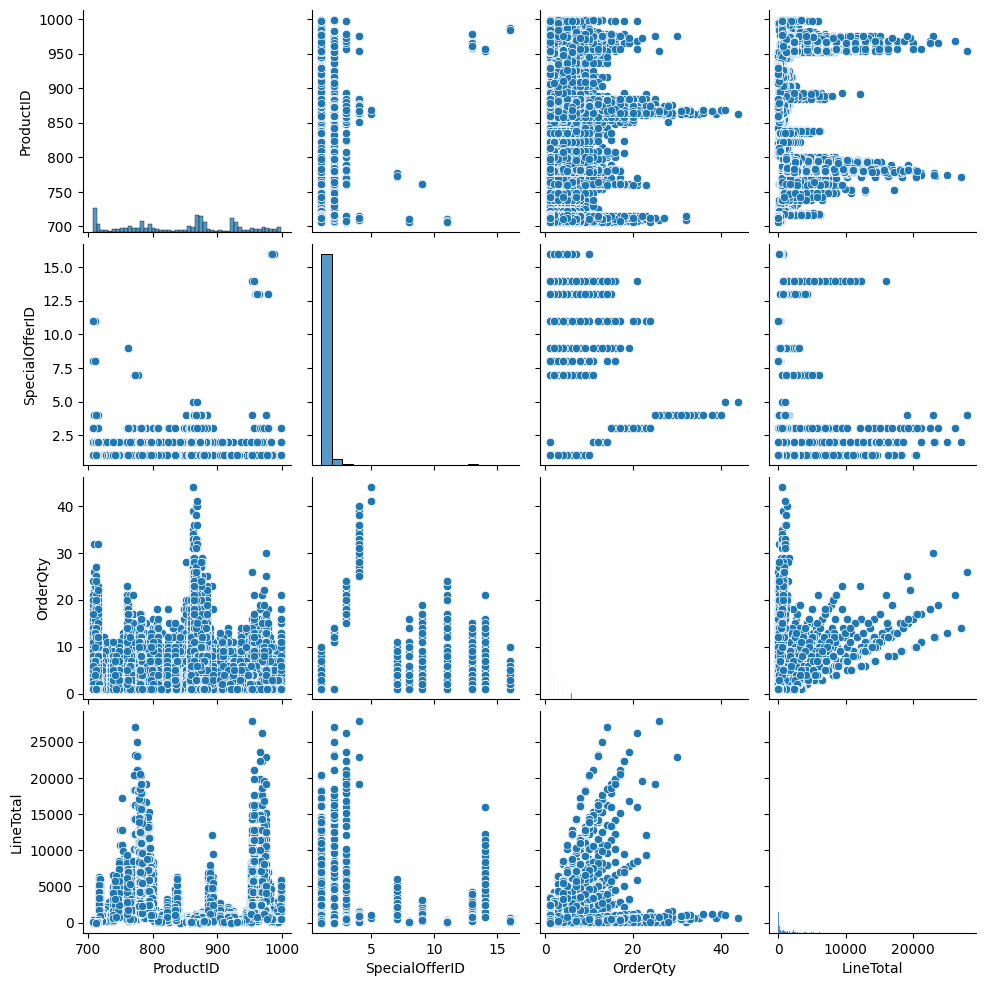

In [ ]:
import seaborn as sns
sns.pairplot(df_pair_plot)

We can see there is no high correlation between our meaningful columns. But there is a sign of positive correlation between OrderQty and LineTotal which make sense.

##Panda Profiling

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_file('PandasProfilingReport.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##EDA

###Sales Trends Over Time:

In [29]:
df_EDA =df.copy()

In [30]:
df_EDA['Day'] = df_EDA['OrderDate'].dt.day
df_EDA['Month'] = df_EDA['OrderDate'].dt.month
df_EDA['Quarter'] = df_EDA['OrderDate'].dt.quarter
df_EDA['Year'] = df_EDA['OrderDate'].dt.year
df_EDA['YearMonth'] = df_EDA['OrderDate'].dt.strftime('%Y-%m')
df_EDA['YearQuarter'] = df_EDA['Year'].astype(str) + '-Q' + df_EDA['Quarter'].astype(str)
df_EDA = df_EDA.sort_values('OrderDate')

####Sales Over Months:

In [31]:
#We are intersted on seeing the aggrigation of the customer orders with its value and time
sales_qty_date = df_EDA.groupby(['YearMonth'], as_index=False).agg({'OrderQty': 'sum', 'LineTotal': 'sum'})
sales_qty_date.head()

YearMonth  OrderQty     LineTotal
0   2011-05       825  5.038059e+05
1   2011-06       141  4.589108e+05
2   2011-07      2209  2.044600e+06
3   2011-08      2904  2.495817e+06
4   2011-09       157  5.020738e+05

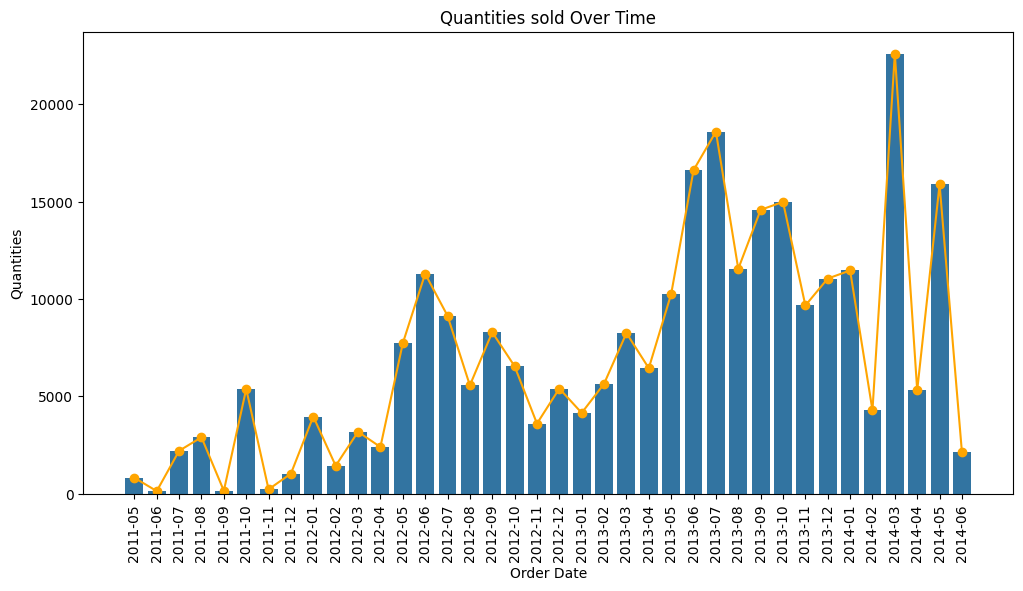

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

sns.barplot(data=sales_qty_date, x="YearMonth", y="OrderQty")
plt.plot(sales_qty_date['YearMonth'], sales_qty_date['OrderQty'], '-o', color='orange')

plt.xlabel('Order Date')
plt.ylabel('Quantities')
plt.title('Quantities sold Over Time')
plt.xticks(rotation=90)
plt.show()

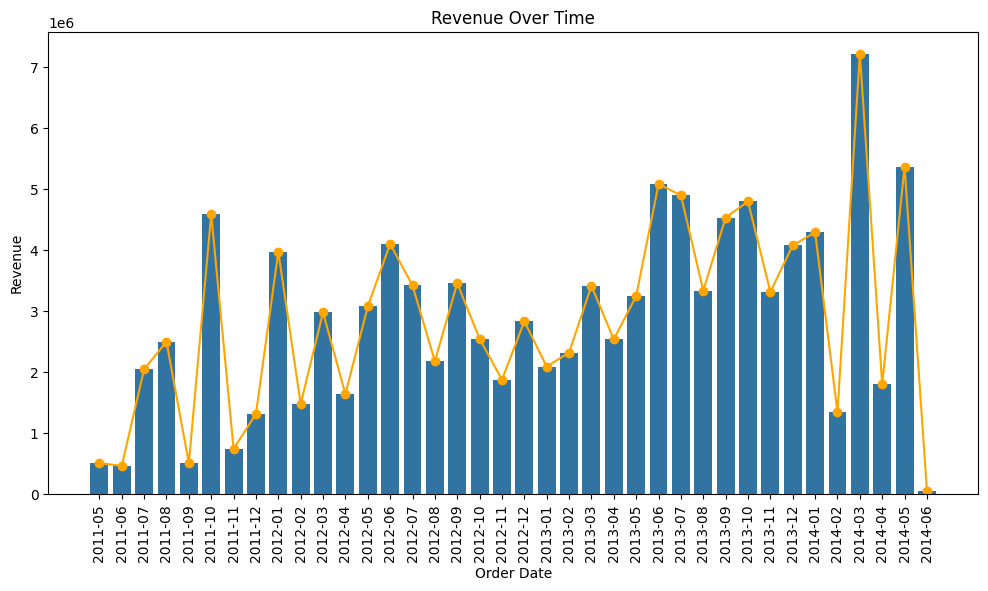

In [33]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(data=sales_qty_date, x="YearMonth", y="LineTotal")
plt.plot(sales_qty_date['YearMonth'], sales_qty_date['LineTotal'], '-o', color='orange')


plt.xlabel('Order Date')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')
plt.xticks(rotation=90)
plt.show()

####Sales Over Quarters:

In [34]:
#We are intersted on seeing the aggrigation of the customer orders with its value and time
sales_qty_date = df_EDA.groupby(['YearQuarter'], as_index=False).agg({'OrderQty': 'sum', 'LineTotal': 'sum'})
sales_qty_date.head()

YearQuarter  OrderQty     LineTotal
0     2011-Q2       966  9.627167e+05
1     2011-Q3      5270  5.042491e+06
2     2011-Q4      6652  6.636465e+06
3     2012-Q1      8593  8.421802e+06
4     2012-Q2     21423  8.808558e+06

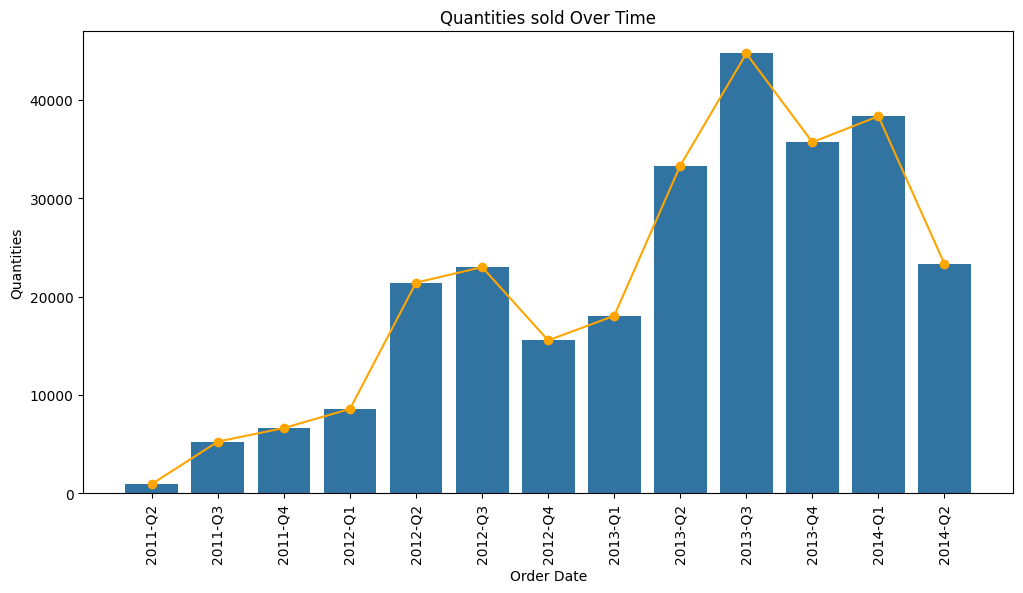

In [35]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(data=sales_qty_date, x="YearQuarter", y="OrderQty")
plt.plot(sales_qty_date['YearQuarter'], sales_qty_date['OrderQty'], '-o', color='orange')

plt.xlabel('Order Date')
plt.ylabel('Quantities')
plt.title('Quantities sold Over Time')
plt.xticks(rotation=90)
plt.show()

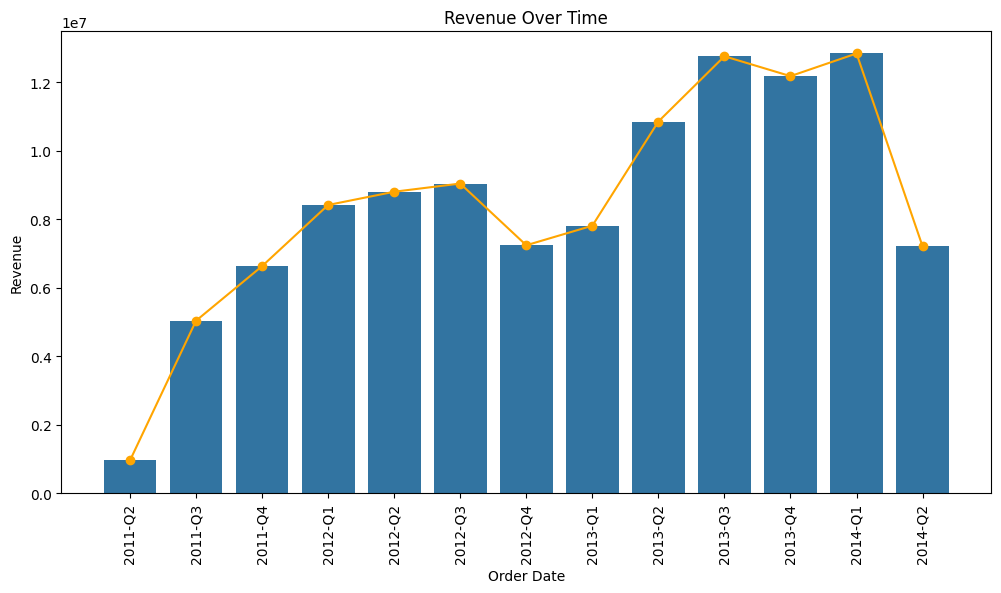

In [36]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(data=sales_qty_date, x="YearQuarter", y="LineTotal")
plt.plot(sales_qty_date['YearQuarter'], sales_qty_date['LineTotal'], '-o', color='orange')

plt.xlabel('Order Date')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')
plt.xticks(rotation=90)
plt.show()

####Sales Over Years:

In [37]:
sales_qty_date = df_EDA.groupby(['Year'], as_index=False).agg({'OrderQty': 'sum', 'LineTotal': 'sum'})
sales_qty_date

Year  OrderQty     LineTotal
0  2011     12888  1.264167e+07
1  2012     68579  3.352430e+07
2  2013    131788  4.362248e+07
3  2014     61659  2.005793e+07

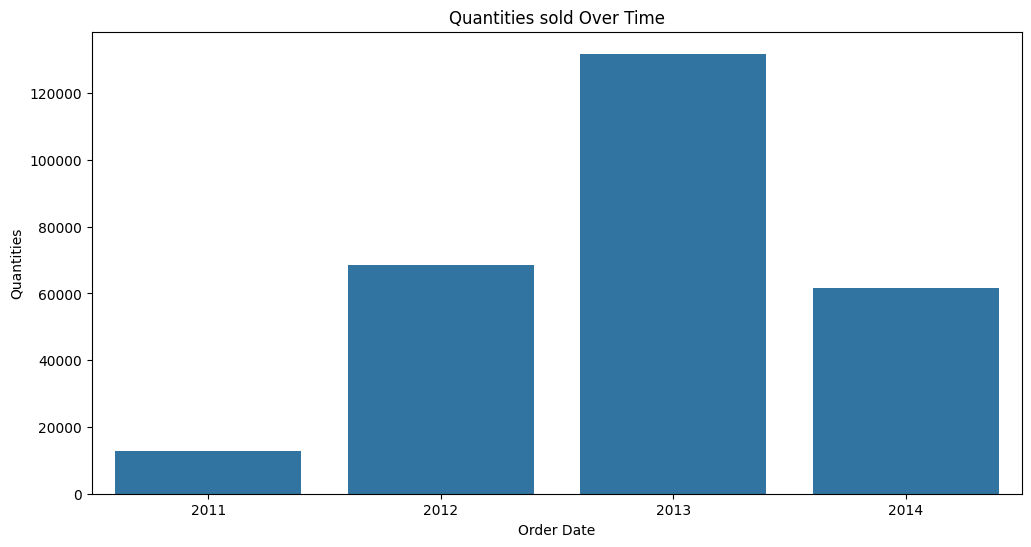

In [38]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(data=sales_qty_date, x="Year", y="OrderQty")
#plt.plot(sales_qty_date['Year'], sales_qty_date['OrderQty'], '-o', color='orange')

plt.xlabel('Order Date')
plt.ylabel('Quantities')
plt.title('Quantities sold Over Time')
plt.show()

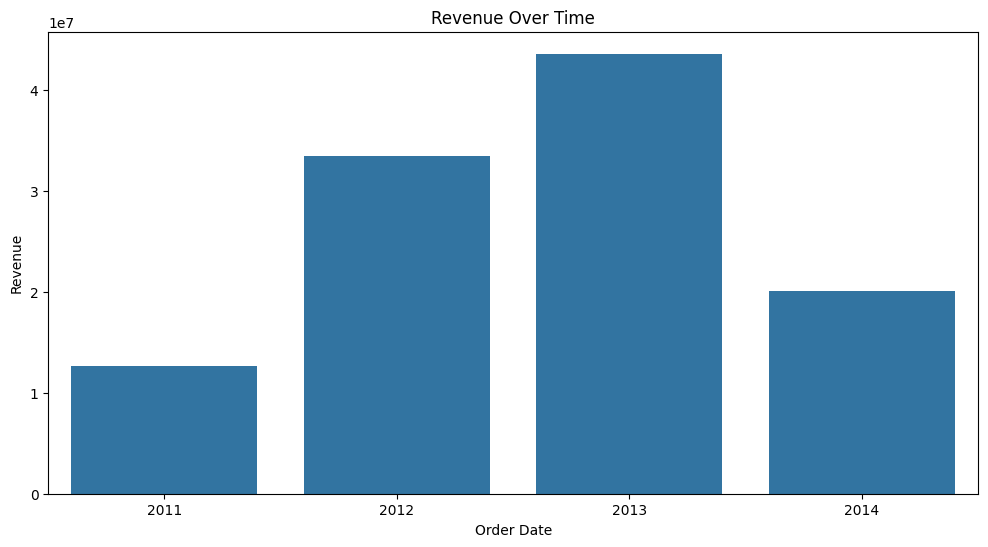

In [39]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(data=sales_qty_date, x="Year", y="LineTotal")
#plt.plot(sales_qty_date['Year'], sales_qty_date['LineTotal'], '-o', color='orange')


plt.xlabel('Order Date')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')
plt.show()

###Orders Date Analysis:

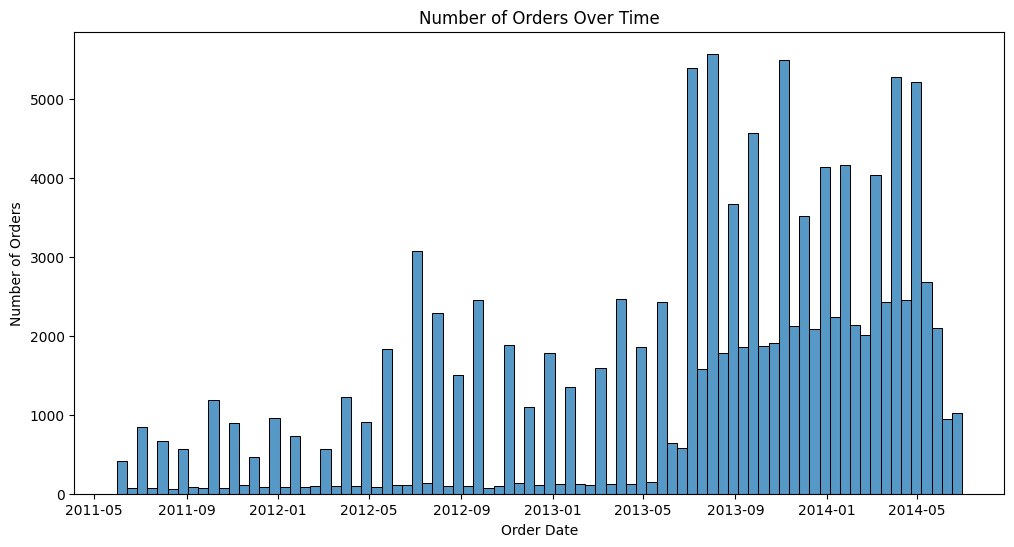

In [40]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.histplot(data=df_EDA, x="OrderDate")

plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Over Time')
plt.show()

###Customer Purchase Behavior:

In [41]:
customer_analysis = df_EDA.groupby(['CustomerID'], as_index=False).agg({'SalesOrderID': 'count', 'LineTotal': 'sum'})
customer_analysis_sales = customer_analysis.sort_values(by='SalesOrderID', ascending=False).head(20)
customer_analysis_sales.head()

CustomerID  SalesOrderID      LineTotal
18722       29722           530  841908.770707
18966       29966           482  537528.095868
18614       29614           451  799277.895062
18950       29950           446  397553.270656
19048       30048           441  602559.892568

<Figure size 1200x600 with 0 Axes>

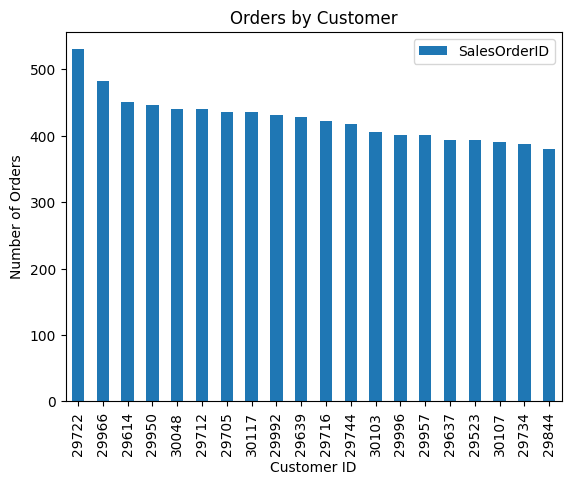

In [42]:
import seaborn as sns

plt.figure(figsize=(12, 6))

customer_analysis_sales.plot.bar(x="CustomerID", y="SalesOrderID")

plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Orders by Customer')
plt.xticks(rotation=90)
plt.show()

In [43]:
customer_analysis_revenue = customer_analysis.sort_values(by='LineTotal', ascending=False).head(20)
customer_analysis_revenue.head()

CustomerID  SalesOrderID      LineTotal
18818       29818           298  877107.192221
18715       29715           366  853849.179524
18722       29722           530  841908.770707
19117       30117           436  816755.576276
18614       29614           451  799277.895062

<Figure size 1200x600 with 0 Axes>

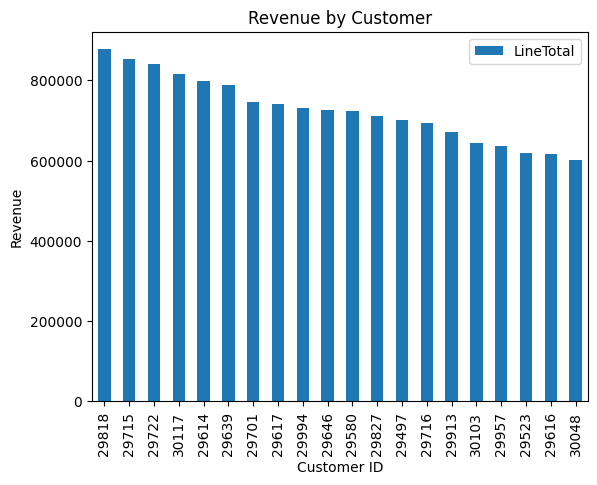

In [44]:
import seaborn as sns

plt.figure(figsize=(12, 6))

customer_analysis_revenue.plot.bar(x="CustomerID", y="LineTotal")

plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.title('Revenue by Customer')
plt.xticks(rotation=90)
plt.show()

###Product Popularity:

In [45]:
product_analysis = df_EDA.groupby(['ProductID'], as_index=False).agg({'CustomerID': 'count', 'LineTotal': 'sum'})
product_analysis_pop = product_analysis.sort_values(by='CustomerID', ascending=False).head(20)
product_analysis_pop.head()

ProductID  CustomerID      LineTotal
139        870        4688   28654.163327
5          712        3382   51229.445623
142        873        3354    8232.597632
188        921        3095   15444.050000
4          711        3090  165406.617049

<Figure size 1200x600 with 0 Axes>

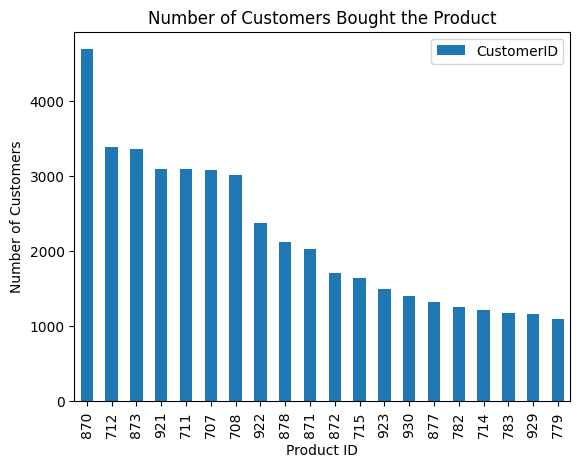

In [46]:
import seaborn as sns

plt.figure(figsize=(12, 6))

product_analysis_pop.plot.bar(x="ProductID", y="CustomerID")

plt.xlabel('Product ID')
plt.ylabel('Number of Customers')
plt.title('Number of Customers Bought the Product')
plt.xticks(rotation=90)
plt.show()

In [47]:
product_analysis = df_EDA.groupby(['ProductID'], as_index=False).agg({'SalesOrderID': 'count', 'OrderQty': 'sum'})
product_analysis_qty = product_analysis.sort_values(by='OrderQty', ascending=False).head(20)
product_analysis_qty.head()

ProductID  SalesOrderID  OrderQty
5          712          3382      8311
139        870          4688      6815
4          711          3090      6743
8          715          1635      6592
1          708          3007      6532

<Figure size 1200x600 with 0 Axes>

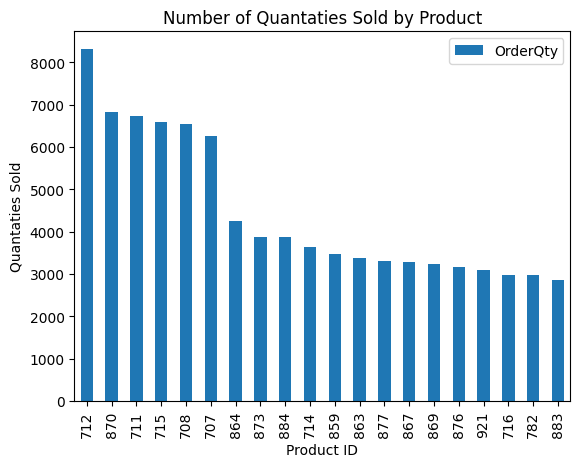

In [48]:
import seaborn as sns

plt.figure(figsize=(12, 6))

product_analysis_qty.plot.bar(x="ProductID", y="OrderQty")

plt.xlabel('Product ID')
plt.ylabel('Quantaties Sold')
plt.title('Number of Quantaties Sold by Product')
plt.xticks(rotation=90)
plt.show()

In [49]:
product_analysis = df_EDA.groupby(['ProductID'], as_index=False).agg({'SalesOrderID': 'count', 'OrderQty': 'sum'})
product_analysis_sales = product_analysis.sort_values(by='SalesOrderID', ascending=False).head(20)
product_analysis_sales.head()

ProductID  SalesOrderID  OrderQty
139        870          4688      6815
5          712          3382      8311
142        873          3354      3865
188        921          3095      3095
4          711          3090      6743

<Figure size 1200x600 with 0 Axes>

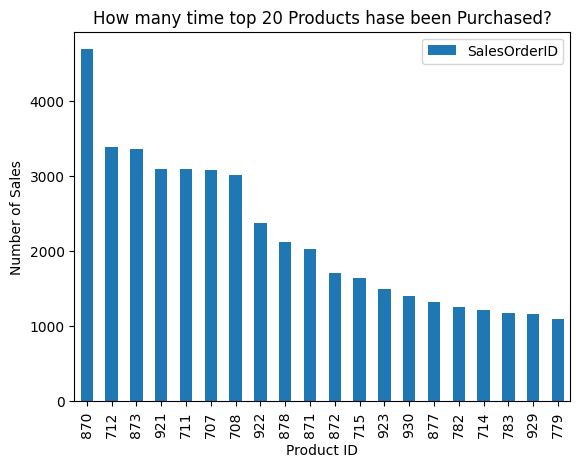

In [50]:
import seaborn as sns

plt.figure(figsize=(12, 6))

product_analysis_sales.plot.bar(x="ProductID", y="SalesOrderID")

plt.xlabel('Product ID')
plt.ylabel('Number of Sales')
plt.title('How many time top 20 Products hase been Purchased?')
plt.xticks(rotation=90)
plt.show()

In [51]:
product_analysis = df_EDA.groupby(['ProductID'], as_index=False).agg({'CustomerID': 'count', 'LineTotal': 'sum'})
product_analysis_rev = product_analysis.sort_values(by='LineTotal', ascending=False).head(20)
product_analysis_rev.head()

ProductID  CustomerID     LineTotal
65        782        1252  4.400593e+06
66        783        1177  4.009495e+06
62        779        1094  3.693678e+06
63        780        1040  3.438479e+06
64        781        1054  3.434257e+06

<Figure size 1200x600 with 0 Axes>

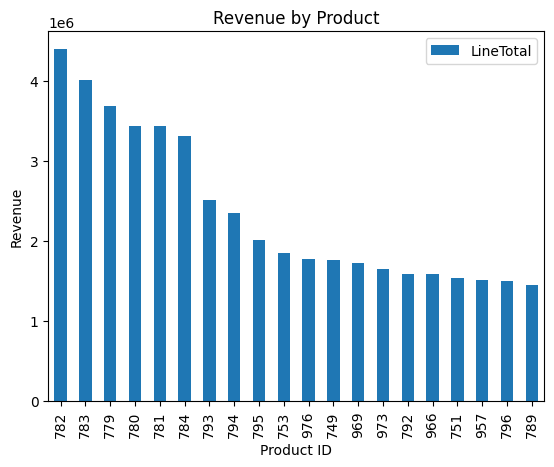

In [52]:
import seaborn as sns

plt.figure(figsize=(12, 6))

product_analysis_rev.plot.bar(x="ProductID", y="LineTotal")

plt.xlabel('Product ID')
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.xticks(rotation=90)
plt.show()

###Special Offer Effectiveness:

In [53]:
offers_analysis = df_EDA.groupby(['SpecialOfferID'], as_index=False).agg({'CustomerID': 'count', 'LineTotal': 'sum'})
offers_analysis_pop = offers_analysis.sort_values(by='CustomerID', ascending=False).head(20)
offers_analysis_pop.head()

SpecialOfferID  CustomerID     LineTotal
0                1      115884  1.023726e+08
1                2        3428  4.896452e+06
2                3         606  1.037643e+06
9               13         524  4.580912e+05
10              14         244  6.123245e+05

<Figure size 1200x600 with 0 Axes>

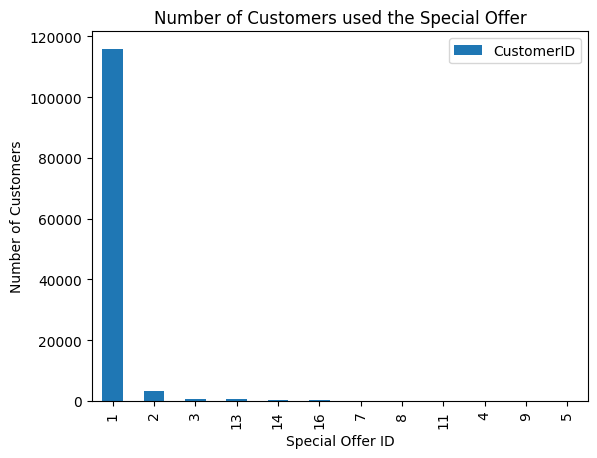

In [54]:
import seaborn as sns

plt.figure(figsize=(12, 6))

offers_analysis_pop.plot.bar(x="SpecialOfferID", y="CustomerID")

plt.xlabel('Special Offer ID')
plt.ylabel('Number of Customers')
plt.title('Number of Customers used the Special Offer')
plt.xticks(rotation=90)
plt.show()

In [55]:
offers_analysis = df_EDA.groupby(['SpecialOfferID'], as_index=False).agg({'CustomerID': 'count', 'LineTotal': 'sum'})
offers_analysis_rev = offers_analysis.sort_values(by='LineTotal', ascending=False).head(20)
offers_analysis_rev.head()

SpecialOfferID  CustomerID     LineTotal
0                1      115884  1.023726e+08
1                2        3428  4.896452e+06
2                3         606  1.037643e+06
10              14         244  6.123245e+05
9               13         524  4.580912e+05

<Figure size 1200x600 with 0 Axes>

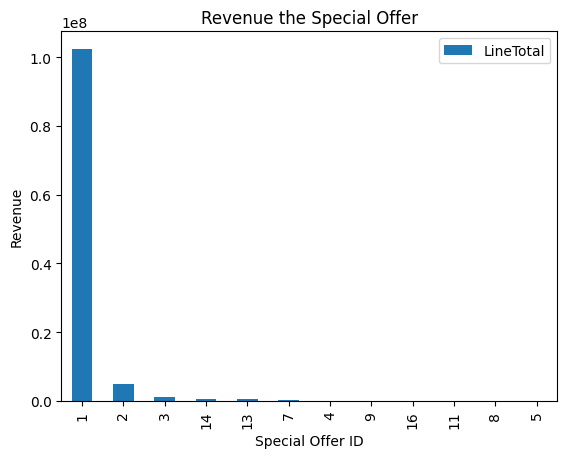

In [56]:
import seaborn as sns

plt.figure(figsize=(12, 6))

offers_analysis_rev.plot.bar(x="SpecialOfferID", y="LineTotal")

plt.xlabel('Special Offer ID')
plt.ylabel('Revenue')
plt.title('Revenue by the Special Offer')
plt.xticks(rotation=90)
plt.show()

#Data Processing and Metrics Calculation

##Outliers Handling: Trimming

In [40]:
df_clean = df.copy()
def Trimming(n):
  columns = df.columns
  Q3 = np.quantile(df[columns[n]], 0.75)
  Q1 = np.quantile(df[columns[n]], 0.25)
  IQR = Q3 - Q1
  Lower_Whisker = Q1 - (1.5*IQR)
  Upper_Whisker = Q3 + (1.5*IQR)
  print(f'Number of records in the column {columns[n]} is {df_clean.shape}')
  num_out = df_clean[(df_clean[columns[n]] < Lower_Whisker) | (df_clean[columns[n]] > Upper_Whisker)][columns[n]].count()
  print(f'Number of outlaiers in the column {columns[n]} is {num_out}')
  index = df_clean[(df_clean[columns[n]] < Lower_Whisker) | (df_clean[columns[n]] > Upper_Whisker)].index
  df_clean.drop(index, inplace=True)
  print(f'Number of records in the column {columns[n]} after trimming is {df_clean.shape}')
Trimming(0)

Number of records in the column CustomerID is (121317, 7)
Number of outlaiers in the column CustomerID is 0
Number of records in the column CustomerID after trimming is (121317, 7)


In [41]:
Trimming(1)

Number of records in the column SalesOrderID is (121317, 7)
Number of outlaiers in the column SalesOrderID is 0
Number of records in the column SalesOrderID after trimming is (121317, 7)


In [42]:
Trimming(2)

Number of records in the column ProductID is (121317, 7)
Number of outlaiers in the column ProductID is 0
Number of records in the column ProductID after trimming is (121317, 7)


In [43]:
Trimming(3)

Number of records in the column SpecialOfferID is (121317, 7)
Number of outlaiers in the column SpecialOfferID is 5433
Number of records in the column SpecialOfferID after trimming is (115884, 7)


In [44]:
Trimming(4)

Number of records in the column OrderDate is (115884, 7)
Number of outlaiers in the column OrderDate is 3983
Number of records in the column OrderDate after trimming is (111901, 7)


In [45]:
Trimming(5)

Number of records in the column OrderQty is (111901, 7)
Number of outlaiers in the column OrderQty is 4648
Number of records in the column OrderQty after trimming is (107253, 7)


In [46]:
Trimming(6)

Number of records in the column LineTotal is (107253, 7)
Number of outlaiers in the column LineTotal is 7691
Number of records in the column LineTotal after trimming is (99562, 7)


In [47]:
df_clean.head()

CustomerID  SalesOrderID  ProductID  SpecialOfferID  OrderDate  \
4012       14617         44639        764               1 2011-10-12   
4015       25567         44642        764               1 2011-10-12   
4026       20170         44653        762               1 2011-10-14   
4034       14639         44661        767               1 2011-10-15   
4038       25564         44665        766               1 2011-10-15   

      OrderQty  LineTotal  
4012         1   699.0982  
4015         1   699.0982  
4026         1   699.0982  
4034         1   699.0982  
4038         1   699.0982

In [49]:
df_clean.shape

(99562, 7)

##Features Engineering

In [59]:
#We are intersted on seeing the aggrigation of the customer orders with its value and time
selected_df = df_clean.groupby(['CustomerID', 'SalesOrderID', 'OrderDate'], as_index=False).agg({'OrderQty': 'sum', 'LineTotal': 'sum'})
selected_df

CustomerID  SalesOrderID  OrderDate  OrderQty   LineTotal
0           11000         51522 2013-06-20         1     21.9800
1           11000         57418 2013-10-03         5   2507.0300
2           11001         51493 2013-06-18         6   2419.9300
3           11001         72773 2014-05-12         4    588.9600
4           11002         51238 2013-06-02         1   2294.9900
...           ...           ...        ...       ...         ...
28558       30118         50675 2013-04-30        78  14823.0076
28559       30118         53480 2013-07-31       105  20631.4680
28560       30118         58928 2013-10-30        86  13441.3620
28561       30118         65221 2014-01-29        61  10037.7180
28562       30118         71803 2014-05-01        98  11139.7260

[28563 rows x 5 columns]

In [60]:
#Calculate the days passed since order
#We will assume this data was extracted on the day of the last order date
print(selected_df.OrderDate.max())
print(selected_df.OrderDate.min())

2014-06-30 00:00:00
2011-10-12 00:00:00


In [61]:
#Our threshold date is 2011-11-11 or selected_df.OrderDate.max()
#We will calculate the days since each order

selected_df['OrderedSinceDays'] = selected_df.OrderDate.max() - selected_df.OrderDate
date_to_int = lambda x : x.days
selected_df['OrderedSinceDays'] = selected_df['OrderedSinceDays'].apply(date_to_int)
selected_df

CustomerID  SalesOrderID  OrderDate  OrderQty   LineTotal  \
0           11000         51522 2013-06-20         1     21.9800   
1           11000         57418 2013-10-03         5   2507.0300   
2           11001         51493 2013-06-18         6   2419.9300   
3           11001         72773 2014-05-12         4    588.9600   
4           11002         51238 2013-06-02         1   2294.9900   
...           ...           ...        ...       ...         ...   
28558       30118         50675 2013-04-30        78  14823.0076   
28559       30118         53480 2013-07-31       105  20631.4680   
28560       30118         58928 2013-10-30        86  13441.3620   
28561       30118         65221 2014-01-29        61  10037.7180   
28562       30118         71803 2014-05-01        98  11139.7260   

       OrderedSinceDays  
0                   375  
1                   270  
2                   377  
3                    49  
4                   393  
...                 ...  
28558               426  
28559               334  
28560               243  
28561               152  
28562                60  

[28563 rows x 6 columns]

##Metrics Calculation

* frequency — the number of repeat purchases (more than 1 purchases)
* recency — the time between the first and the last transaction
* T — the time between the first purchase and the end of the transaction period (last date of the time frame considered for the analysis)
* monetary_value — it is the mean of a given customers sales value



In [62]:
#Frequency
Frequency_df = selected_df.groupby('CustomerID')['SalesOrderID'].count()-1
Frequency_df = Frequency_df.to_frame()
Frequency_df = Frequency_df.rename({'SalesOrderID':'Frequency'}, axis= 'columns')
Frequency_df.reset_index(inplace=True)
Frequency_df

CustomerID  Frequency
0           11000          1
1           11001          1
2           11002          1
3           11003          1
4           11004          1
...           ...        ...
18741       30114          7
18742       30115          7
18743       30116          3
18744       30117          9
18745       30118          7

[18746 rows x 2 columns]

In [63]:
recency_df = selected_df.groupby('CustomerID')['OrderDate'].max() - selected_df.groupby('CustomerID')['OrderDate'].min()
recency_df = recency_df.to_frame()
recency_df = recency_df.rename({'OrderDate':'Recency'}, axis= 'columns')
recency_df.reset_index(inplace=True)
date_to_int = lambda x : x.days
recency_df['Recency'] = recency_df['Recency'].apply(date_to_int)
recency_df

CustomerID  Recency
0           11000      105
1           11001      328
2           11002       54
3           11003      125
4           11004       99
...           ...      ...
18741       30114      640
18742       30115      639
18743       30116      275
18744       30117      820
18745       30118      639

[18746 rows x 2 columns]

In [64]:
T_df = selected_df.OrderDate.max() - selected_df.groupby('CustomerID')['OrderDate'].min()
T_df = T_df.to_frame()
T_df = T_df.rename({'OrderDate':'T'}, axis= 'columns')
T_df.reset_index(inplace=True)
date_to_int = lambda x : x.days
T_df['T'] = T_df['T'].apply(date_to_int)
T_df

CustomerID    T
0           11000  375
1           11001  377
2           11002  393
3           11003  388
4           11004  371
...           ...  ...
18741       30114  761
18742       30115  730
18743       30116  396
18744       30117  911
18745       30118  699

[18746 rows x 2 columns]

In [65]:
Revenue_df = selected_df.groupby('CustomerID')['LineTotal'].sum()
Revenue_df = Revenue_df.to_frame()
Revenue_df = Revenue_df.rename({'LineTotal':'Revenue'}, axis= 'columns')
Revenue_df.reset_index(inplace=True)
Revenue_df

CustomerID      Revenue
0           11000    2529.0100
1           11001    3008.8900
2           11002    4714.0500
3           11003    4739.3000
4           11004    4796.0200
...           ...          ...
18741       30114   11652.9911
18742       30115    8917.5594
18743       30116   68579.7420
18744       30117  237366.2232
18745       30118   98766.1883

[18746 rows x 2 columns]

In [66]:
Monetary_df = selected_df.sort_values(by=['CustomerID', 'OrderDate'])

Monetary_df['OrderNumber'] = Monetary_df.groupby('CustomerID').cumcount() + 1

Monetary_df['AdjustedLineTotal'] = Monetary_df.apply(lambda x: 0 if x['OrderNumber'] == 1 else x['LineTotal'], axis=1)

total_revenue_per_customer = Monetary_df.groupby('CustomerID')['AdjustedLineTotal'].sum().reset_index()
order_count_per_customer = Monetary_df.groupby('CustomerID').size().reset_index(name='OrderCount')

Monetary_df = pd.merge(total_revenue_per_customer, order_count_per_customer, on='CustomerID')

Monetary_df['AdjustedOrderCount'] = Monetary_df['OrderCount'] - 1
Monetary_df['AdjustedOrderCount'] = Monetary_df['AdjustedOrderCount'].clip(lower=1)

Monetary_df['MonetaryValue'] = Monetary_df['AdjustedLineTotal'] / Monetary_df['AdjustedOrderCount']

Monetary_df.loc[Monetary_df['OrderCount'] == 1, 'MonetaryValue'] = 0

Monetary_df = Monetary_df[['CustomerID', 'MonetaryValue']]
Monetary_df

CustomerID  MonetaryValue
0           11000    2507.030000
1           11001     588.960000
2           11002    2419.060000
3           11003    2420.340000
4           11004    2419.060000
...           ...            ...
18741       30114    1339.262386
18742       30115    1175.541814
18743       30116   18417.776000
18744       30117   24191.248544
18745       30118   12582.259929

[18746 rows x 2 columns]

In [67]:
#Merging the the metrics data
metrics_df = Frequency_df.merge(recency_df).merge(T_df).merge(Monetary_df).merge(Revenue_df)
metrics_df

CustomerID  Frequency  Recency    T  MonetaryValue      Revenue
0           11000          1      105  375    2507.030000    2529.0100
1           11001          1      328  377     588.960000    3008.8900
2           11002          1       54  393    2419.060000    4714.0500
3           11003          1      125  388    2420.340000    4739.3000
4           11004          1       99  371    2419.060000    4796.0200
...           ...        ...      ...  ...            ...          ...
18741       30114          7      640  761    1339.262386   11652.9911
18742       30115          7      639  730    1175.541814    8917.5594
18743       30116          3      275  396   18417.776000   68579.7420
18744       30117          9      820  911   24191.248544  237366.2232
18745       30118          7      639  699   12582.259929   98766.1883

[18746 rows x 6 columns]

#Data Modeling

##Data Prepration

In [71]:
#Spliting the data to trainning and test
#We will use Date as threshhold for

In [72]:
print(selected_df.OrderDate.max())
print(selected_df.OrderDate.min())

2014-06-30 00:00:00
2011-10-12 00:00:00


In [73]:
selected_df.shape

(28563, 6)

In [74]:
#Our data range across 164 days
#We will use first 100 days to predict the next 64 days
#We will be predicting the clv of the customer that placed an order in the first 100 recorded days
trainning_df = selected_df[selected_df['OrderDate']< '2014-01-01 00:00:00']
trainning_df

CustomerID  SalesOrderID  OrderDate  OrderQty   LineTotal  \
0           11000         51522 2013-06-20         1     21.9800   
1           11000         57418 2013-10-03         5   2507.0300   
2           11001         51493 2013-06-18         6   2419.9300   
4           11002         51238 2013-06-02         1   2294.9900   
5           11002         53237 2013-07-26         2   2419.0600   
...           ...           ...        ...       ...         ...   
28556       30118         48318 2012-10-30        66  12458.7918   
28557       30118         49499 2013-01-28        27   5543.7461   
28558       30118         50675 2013-04-30        78  14823.0076   
28559       30118         53480 2013-07-31       105  20631.4680   
28560       30118         58928 2013-10-30        86  13441.3620   

       OrderedSinceDays  
0                   375  
1                   270  
2                   377  
4                   393  
5                   339  
...                 ...  
28556               608  
28557               518  
28558               426  
28559               334  
28560               243  

[16880 rows x 6 columns]

In [75]:
test_df = selected_df[selected_df['OrderDate']>= '2014-01-01 00:00:00']
test_df

CustomerID  SalesOrderID  OrderDate  OrderQty  LineTotal  \
3           11001         72773 2014-05-12         4    588.960   
25          11012         68413 2014-03-17         2      6.280   
27          11013         74908 2014-06-23         3     74.980   
33          11017         68396 2014-03-16         1    742.350   
35          11018         69087 2014-03-26         4    791.320   
...           ...           ...        ...       ...        ...   
28540       30115         69469 2014-03-31         1    672.294   
28544       30116         67279 2014-03-01        66  22114.950   
28554       30117         69412 2014-03-31        94  19085.682   
28561       30118         65221 2014-01-29        61  10037.718   
28562       30118         71803 2014-05-01        98  11139.726   

       OrderedSinceDays  
3                    49  
25                  105  
27                    7  
33                  106  
35                   96  
...                 ...  
28540                91  
28544               121  
28554                91  
28561               152  
28562                60  

[11683 rows x 6 columns]

In [76]:
traning_customers = set(trainning_df['CustomerID'])

In [77]:
#Droping new customers on the test dataframe
test_customers = set(test_df['CustomerID'])
for c in test_customers:
  if c not in traning_customers:
    test_df = test_df[test_df.CustomerID != c]
test_df

CustomerID  SalesOrderID  OrderDate  OrderQty  LineTotal  \
3           11001         72773 2014-05-12         4    588.960   
25          11012         68413 2014-03-17         2      6.280   
27          11013         74908 2014-06-23         3     74.980   
33          11017         68396 2014-03-16         1    742.350   
35          11018         69087 2014-03-26         4    791.320   
...           ...           ...        ...       ...        ...   
28540       30115         69469 2014-03-31         1    672.294   
28544       30116         67279 2014-03-01        66  22114.950   
28554       30117         69412 2014-03-31        94  19085.682   
28561       30118         65221 2014-01-29        61  10037.718   
28562       30118         71803 2014-05-01        98  11139.726   

       OrderedSinceDays  
3                    49  
25                  105  
27                    7  
33                  106  
35                   96  
...                 ...  
28540                91  
28544               121  
28554                91  
28561               152  
28562                60  

[4421 rows x 6 columns]

In [78]:
#Droping old customers with no test data in the test dataframe
test_customers = set(test_df['CustomerID'])
traning_customers = set(trainning_df['CustomerID'])
for c in traning_customers:
  if c not in test_customers:
    trainning_df = trainning_df[trainning_df.CustomerID != c]
trainning_df

CustomerID  SalesOrderID  OrderDate  OrderQty   LineTotal  \
2           11001         51493 2013-06-18         6   2419.9300   
24          11012         54508 2013-08-16         3     74.9800   
26          11013         56137 2013-09-13         2     38.9800   
32          11017         51256 2013-06-03         1     21.9800   
34          11018         51492 2013-06-18         1     21.9800   
...           ...           ...        ...       ...         ...   
28556       30118         48318 2012-10-30        66  12458.7918   
28557       30118         49499 2013-01-28        27   5543.7461   
28558       30118         50675 2013-04-30        78  14823.0076   
28559       30118         53480 2013-07-31       105  20631.4680   
28560       30118         58928 2013-10-30        86  13441.3620   

       OrderedSinceDays  
2                   377  
24                  318  
26                  290  
32                  392  
34                  377  
...                 ...  
28556               608  
28557               518  
28558               426  
28559               334  
28560               243  

[6253 rows x 6 columns]

In [79]:
#Frequency
Frequency_df_3yrs = trainning_df.groupby('CustomerID')['SalesOrderID'].count()-1
Frequency_df_3yrs = Frequency_df_3yrs.to_frame()
Frequency_df_3yrs = Frequency_df_3yrs.rename({'SalesOrderID':'Frequency'}, axis= 'columns')
Frequency_df_3yrs.reset_index(inplace=True)
Frequency_df_3yrs

recency_df_3yrs = trainning_df.groupby('CustomerID')['OrderDate'].max() - selected_df.groupby('CustomerID')['OrderDate'].min()
recency_df_3yrs = recency_df_3yrs.to_frame()
recency_df_3yrs = recency_df_3yrs.rename({'OrderDate':'Recency'}, axis= 'columns')
recency_df_3yrs.reset_index(inplace=True)
date_to_int = lambda x : x.days
recency_df_3yrs['Recency'] = recency_df_3yrs['Recency'].apply(date_to_int)
recency_df_3yrs

T_df_3yrs = -1* (trainning_df.groupby('CustomerID')['OrderDate'].min() - selected_df.OrderDate.max())
T_df_3yrs = T_df_3yrs.to_frame()
T_df_3yrs = T_df_3yrs.rename({'OrderDate':'T'}, axis= 'columns')
T_df_3yrs.reset_index(inplace=True)
date_to_int = lambda x : x.days
T_df_3yrs['T'] = T_df_3yrs['T'].apply(date_to_int)
T_df_3yrs

Monetary_df_3yrs = trainning_df.sort_values(by=['CustomerID', 'OrderDate'])

Monetary_df_3yrs['OrderNumber'] = Monetary_df_3yrs.groupby('CustomerID').cumcount() + 1

Monetary_df_3yrs['AdjustedLineTotal'] = Monetary_df_3yrs.apply(lambda x: 0 if x['OrderNumber'] == 1 else x['LineTotal'], axis=1)

total_revenue_per_customer = Monetary_df_3yrs.groupby('CustomerID')['AdjustedLineTotal'].sum().reset_index()
order_count_per_customer = Monetary_df_3yrs.groupby('CustomerID').size().reset_index(name='OrderCount')

Monetary_df_3yrs = pd.merge(total_revenue_per_customer, order_count_per_customer, on='CustomerID')

Monetary_df_3yrs['AdjustedOrderCount'] = Monetary_df_3yrs['OrderCount'] - 1
Monetary_df_3yrs['AdjustedOrderCount'] = Monetary_df_3yrs['AdjustedOrderCount'].clip(lower=1)

Monetary_df_3yrs['MonetaryValue'] = Monetary_df_3yrs['AdjustedLineTotal'] / Monetary_df_3yrs['AdjustedOrderCount']

Monetary_df_3yrs.loc[Monetary_df_3yrs['OrderCount'] == 1, 'MonetaryValue'] = 0

Monetary_df_3yrs = Monetary_df_3yrs[['CustomerID', 'MonetaryValue']]
Monetary_df_3yrs

Revenue_df_3yrs = trainning_df.groupby('CustomerID')['LineTotal'].sum()
Revenue_df_3yrs = Revenue_df_3yrs.to_frame()
Revenue_df_3yrs = Revenue_df_3yrs.rename({'LineTotal':'Revenue'}, axis= 'columns')
Revenue_df_3yrs.reset_index(inplace=True)
Revenue_df_3yrs

#Merging the the metrics data
metrics_df_3yrs = Frequency_df_3yrs.merge(recency_df_3yrs).merge(T_df_3yrs).merge(Monetary_df_3yrs).merge(Revenue_df_3yrs)
metrics_df_3yrs

CustomerID  Frequency  Recency    T  MonetaryValue      Revenue
0          11001          0      0.0  377       0.000000    2419.9300
1          11012          0      0.0  318       0.000000      74.9800
2          11013          0      0.0  290       0.000000      38.9800
3          11017          0      0.0  392       0.000000      21.9800
4          11018          0      0.0  377       0.000000      21.9800
...          ...        ...      ...  ...            ...          ...
3549       30114          6    549.0  761    1467.610783   11083.8191
3550       30115          6    549.0  730    1259.416450    8245.2654
3551       30116          2    184.0  396   16569.189000   46464.7920
3552       30117          8    730.0  911   24829.444362  218280.5412
3553       30118          5    456.0  699   13379.675100   77588.7443

[3554 rows x 6 columns]

In [80]:
Revenue_df_next6months = test_df.groupby('CustomerID')['LineTotal'].sum()
Revenue_df_next6months = Revenue_df_next6months.to_frame()
Revenue_df_next6months = Revenue_df_next6months.rename({'LineTotal':'Next_6_Months_Revenue'}, axis= 'columns')
Revenue_df_next6months.reset_index(inplace=True)
Revenue_df_next6months

CustomerID  Next_6_Months_Revenue
0          11001                588.960
1          11012                  6.280
2          11013                 74.980
3          11017                742.350
4          11018                791.320
...          ...                    ...
3549       30114                569.172
3550       30115                672.294
3551       30116              22114.950
3552       30117              19085.682
3553       30118              21177.444

[3554 rows x 2 columns]

In [81]:
benchmark_df = metrics_df_3yrs.copy()
benchmark_df = benchmark_df.merge(Revenue_df_next6months)
benchmark_df['Adjusted_Revenue'] = benchmark_df['Next_6_Months_Revenue']*0.35
benchmark_df

CustomerID  Frequency  Recency    T  MonetaryValue      Revenue  \
0          11001          0      0.0  377       0.000000    2419.9300   
1          11012          0      0.0  318       0.000000      74.9800   
2          11013          0      0.0  290       0.000000      38.9800   
3          11017          0      0.0  392       0.000000      21.9800   
4          11018          0      0.0  377       0.000000      21.9800   
...          ...        ...      ...  ...            ...          ...   
3549       30114          6    549.0  761    1467.610783   11083.8191   
3550       30115          6    549.0  730    1259.416450    8245.2654   
3551       30116          2    184.0  396   16569.189000   46464.7920   
3552       30117          8    730.0  911   24829.444362  218280.5412   
3553       30118          5    456.0  699   13379.675100   77588.7443   

      Next_6_Months_Revenue  Adjusted_Revenue  
0                   588.960          206.1360  
1                     6.280            2.1980  
2                    74.980           26.2430  
3                   742.350          259.8225  
4                   791.320          276.9620  
...                     ...               ...  
3549                569.172          199.2102  
3550                672.294          235.3029  
3551              22114.950         7740.2325  
3552              19085.682         6679.9887  
3553              21177.444         7412.1054  

[3554 rows x 8 columns]

In [82]:
BGF_df = metrics_df_3yrs.copy()
BGF_df = BGF_df.merge(Revenue_df_next6months)
BGF_df['Adjusted_Revenue'] = BGF_df['Next_6_Months_Revenue']*0.35
BGF_df

CustomerID  Frequency  Recency    T  MonetaryValue      Revenue  \
0          11001          0      0.0  377       0.000000    2419.9300   
1          11012          0      0.0  318       0.000000      74.9800   
2          11013          0      0.0  290       0.000000      38.9800   
3          11017          0      0.0  392       0.000000      21.9800   
4          11018          0      0.0  377       0.000000      21.9800   
...          ...        ...      ...  ...            ...          ...   
3549       30114          6    549.0  761    1467.610783   11083.8191   
3550       30115          6    549.0  730    1259.416450    8245.2654   
3551       30116          2    184.0  396   16569.189000   46464.7920   
3552       30117          8    730.0  911   24829.444362  218280.5412   
3553       30118          5    456.0  699   13379.675100   77588.7443   

      Next_6_Months_Revenue  Adjusted_Revenue  
0                   588.960          206.1360  
1                     6.280            2.1980  
2                    74.980           26.2430  
3                   742.350          259.8225  
4                   791.320          276.9620  
...                     ...               ...  
3549                569.172          199.2102  
3550                672.294          235.3029  
3551              22114.950         7740.2325  
3552              19085.682         6679.9887  
3553              21177.444         7412.1054  

[3554 rows x 8 columns]

In [83]:
ML_df = metrics_df_3yrs.drop(columns ='Revenue')
ML_df = ML_df.merge(Revenue_df_next6months)
ML_df['Adjusted_Revenue'] = ML_df['Next_6_Months_Revenue']*0.35
ML_df

CustomerID  Frequency  Recency    T  MonetaryValue  \
0          11001          0      0.0  377       0.000000   
1          11012          0      0.0  318       0.000000   
2          11013          0      0.0  290       0.000000   
3          11017          0      0.0  392       0.000000   
4          11018          0      0.0  377       0.000000   
...          ...        ...      ...  ...            ...   
3549       30114          6    549.0  761    1467.610783   
3550       30115          6    549.0  730    1259.416450   
3551       30116          2    184.0  396   16569.189000   
3552       30117          8    730.0  911   24829.444362   
3553       30118          5    456.0  699   13379.675100   

      Next_6_Months_Revenue  Adjusted_Revenue  
0                   588.960          206.1360  
1                     6.280            2.1980  
2                    74.980           26.2430  
3                   742.350          259.8225  
4                   791.320          276.9620  
...                     ...               ...  
3549                569.172          199.2102  
3550                672.294          235.3029  
3551              22114.950         7740.2325  
3552              19085.682         6679.9887  
3553              21177.444         7412.1054  

[3554 rows x 7 columns]

##Method 1: [Benchmark] Historical CLV


AVP = Total Revenue/ Number of Purchases

APFR = Number of Purchases/ Number of Unique Periods

CV = APV * APFR

ACL = Last Purchase - First Purchase (in years)

CLV = CV * ACL

Adjusted_CLV = CLV* Average gross margin

Predectied_CLV for next 6 months = CLV * (0.5 / Period in years)

Adjusted_Predicted_CLV = Predectied_CLV* Average gross margin

In [106]:
#AVP
benchmark_df['APV'] = benchmark_df['Revenue']/(benchmark_df['Frequency']+1)
benchmark_df.head()

CustomerID  Frequency  Recency    T  MonetaryValue  Revenue  \
0       11001          0      0.0  377            0.0  2419.93   
1       11012          0      0.0  318            0.0    74.98   
2       11013          0      0.0  290            0.0    38.98   
3       11017          0      0.0  392            0.0    21.98   
4       11018          0      0.0  377            0.0    21.98   

   Next_6_Months_Revenue  Adjusted_Revenue      APV      APFR           CV  \
0                 588.96          206.1360  2419.93  0.450062  1089.117694   
1                   6.28            2.1980    74.98  0.450062    33.745623   
2                  74.98           26.2430    38.98  0.450062    17.543403   
3                 742.35          259.8225    21.98  0.450062     9.892355   
4                 791.32          276.9620    21.98  0.450062     9.892355   

   ACL  CLV  Adjusted_CLV  Predicted_CLV  Adjucted_Predicted_CLV  
0  0.0  0.0           0.0            0.0                     0.0  
1  0.0  0.0           0.0            0.0                     0.0  
2  0.0  0.0           0.0            0.0                     0.0  
3  0.0  0.0           0.0            0.0                     0.0  
4  0.0  0.0           0.0            0.0                     0.0

In [107]:
#APFR
period = ((trainning_df.OrderDate.max()- trainning_df.OrderDate.min()).days)/365
print(f"Period = {period:.2F} years.")
benchmark_df['APFR'] = (benchmark_df['Frequency']+1)/period
benchmark_df.head()

Period = 2.22 years.


CustomerID  Frequency  Recency    T  MonetaryValue  Revenue  \
0       11001          0      0.0  377            0.0  2419.93   
1       11012          0      0.0  318            0.0    74.98   
2       11013          0      0.0  290            0.0    38.98   
3       11017          0      0.0  392            0.0    21.98   
4       11018          0      0.0  377            0.0    21.98   

   Next_6_Months_Revenue  Adjusted_Revenue      APV      APFR           CV  \
0                 588.96          206.1360  2419.93  0.450062  1089.117694   
1                   6.28            2.1980    74.98  0.450062    33.745623   
2                  74.98           26.2430    38.98  0.450062    17.543403   
3                 742.35          259.8225    21.98  0.450062     9.892355   
4                 791.32          276.9620    21.98  0.450062     9.892355   

   ACL  CLV  Adjusted_CLV  Predicted_CLV  Adjucted_Predicted_CLV  
0  0.0  0.0           0.0            0.0                     0.0  
1  0.0  0.0           0.0            0.0                     0.0  
2  0.0  0.0           0.0            0.0                     0.0  
3  0.0  0.0           0.0            0.0                     0.0  
4  0.0  0.0           0.0            0.0                     0.0

In [108]:
#CV
benchmark_df['CV'] = benchmark_df['APV'] * benchmark_df['APFR']
benchmark_df.head()

CustomerID  Frequency  Recency    T  MonetaryValue  Revenue  \
0       11001          0      0.0  377            0.0  2419.93   
1       11012          0      0.0  318            0.0    74.98   
2       11013          0      0.0  290            0.0    38.98   
3       11017          0      0.0  392            0.0    21.98   
4       11018          0      0.0  377            0.0    21.98   

   Next_6_Months_Revenue  Adjusted_Revenue      APV      APFR           CV  \
0                 588.96          206.1360  2419.93  0.450062  1089.117694   
1                   6.28            2.1980    74.98  0.450062    33.745623   
2                  74.98           26.2430    38.98  0.450062    17.543403   
3                 742.35          259.8225    21.98  0.450062     9.892355   
4                 791.32          276.9620    21.98  0.450062     9.892355   

   ACL  CLV  Adjusted_CLV  Predicted_CLV  Adjucted_Predicted_CLV  
0  0.0  0.0           0.0            0.0                     0.0  
1  0.0  0.0           0.0            0.0                     0.0  
2  0.0  0.0           0.0            0.0                     0.0  
3  0.0  0.0           0.0            0.0                     0.0  
4  0.0  0.0           0.0            0.0                     0.0

In [109]:
#ACL
benchmark_df['ACL'] = benchmark_df['Recency']/365
benchmark_df.head()

CustomerID  Frequency  Recency    T  MonetaryValue  Revenue  \
0       11001          0      0.0  377            0.0  2419.93   
1       11012          0      0.0  318            0.0    74.98   
2       11013          0      0.0  290            0.0    38.98   
3       11017          0      0.0  392            0.0    21.98   
4       11018          0      0.0  377            0.0    21.98   

   Next_6_Months_Revenue  Adjusted_Revenue      APV      APFR           CV  \
0                 588.96          206.1360  2419.93  0.450062  1089.117694   
1                   6.28            2.1980    74.98  0.450062    33.745623   
2                  74.98           26.2430    38.98  0.450062    17.543403   
3                 742.35          259.8225    21.98  0.450062     9.892355   
4                 791.32          276.9620    21.98  0.450062     9.892355   

   ACL  CLV  Adjusted_CLV  Predicted_CLV  Adjucted_Predicted_CLV  
0  0.0  0.0           0.0            0.0                     0.0  
1  0.0  0.0           0.0            0.0                     0.0  
2  0.0  0.0           0.0            0.0                     0.0  
3  0.0  0.0           0.0            0.0                     0.0  
4  0.0  0.0           0.0            0.0                     0.0

In [110]:
#CLV
benchmark_df['CLV'] = benchmark_df['CV'] * benchmark_df['ACL']
benchmark_df.head()

CustomerID  Frequency  Recency    T  MonetaryValue  Revenue  \
0       11001          0      0.0  377            0.0  2419.93   
1       11012          0      0.0  318            0.0    74.98   
2       11013          0      0.0  290            0.0    38.98   
3       11017          0      0.0  392            0.0    21.98   
4       11018          0      0.0  377            0.0    21.98   

   Next_6_Months_Revenue  Adjusted_Revenue      APV      APFR           CV  \
0                 588.96          206.1360  2419.93  0.450062  1089.117694   
1                   6.28            2.1980    74.98  0.450062    33.745623   
2                  74.98           26.2430    38.98  0.450062    17.543403   
3                 742.35          259.8225    21.98  0.450062     9.892355   
4                 791.32          276.9620    21.98  0.450062     9.892355   

   ACL  CLV  Adjusted_CLV  Predicted_CLV  Adjucted_Predicted_CLV  
0  0.0  0.0           0.0            0.0                     0.0  
1  0.0  0.0           0.0            0.0                     0.0  
2  0.0  0.0           0.0            0.0                     0.0  
3  0.0  0.0           0.0            0.0                     0.0  
4  0.0  0.0           0.0            0.0                     0.0

In [111]:
#Adjusted_CLV
#For Average gross margin of 35%
AGM = 0.35
benchmark_df['Adjusted_CLV'] = benchmark_df['CLV'] * AGM
benchmark_df.head()

CustomerID  Frequency  Recency    T  MonetaryValue  Revenue  \
0       11001          0      0.0  377            0.0  2419.93   
1       11012          0      0.0  318            0.0    74.98   
2       11013          0      0.0  290            0.0    38.98   
3       11017          0      0.0  392            0.0    21.98   
4       11018          0      0.0  377            0.0    21.98   

   Next_6_Months_Revenue  Adjusted_Revenue      APV      APFR           CV  \
0                 588.96          206.1360  2419.93  0.450062  1089.117694   
1                   6.28            2.1980    74.98  0.450062    33.745623   
2                  74.98           26.2430    38.98  0.450062    17.543403   
3                 742.35          259.8225    21.98  0.450062     9.892355   
4                 791.32          276.9620    21.98  0.450062     9.892355   

   ACL  CLV  Adjusted_CLV  Predicted_CLV  Adjucted_Predicted_CLV  
0  0.0  0.0           0.0            0.0                     0.0  
1  0.0  0.0           0.0            0.0                     0.0  
2  0.0  0.0           0.0            0.0                     0.0  
3  0.0  0.0           0.0            0.0                     0.0  
4  0.0  0.0           0.0            0.0                     0.0

In [112]:
benchmark_df['Predicted_CLV'] = benchmark_df['CLV'] * (0.5/period)
benchmark_df['Adjucted_Predicted_CLV'] = benchmark_df['Predicted_CLV'] * AGM
benchmark_df

CustomerID  Frequency  Recency    T  MonetaryValue      Revenue  \
0          11001          0      0.0  377       0.000000    2419.9300   
1          11012          0      0.0  318       0.000000      74.9800   
2          11013          0      0.0  290       0.000000      38.9800   
3          11017          0      0.0  392       0.000000      21.9800   
4          11018          0      0.0  377       0.000000      21.9800   
...          ...        ...      ...  ...            ...          ...   
3549       30114          6    549.0  761    1467.610783   11083.8191   
3550       30115          6    549.0  730    1259.416450    8245.2654   
3551       30116          2    184.0  396   16569.189000   46464.7920   
3552       30117          8    730.0  911   24829.444362  218280.5412   
3553       30118          5    456.0  699   13379.675100   77588.7443   

      Next_6_Months_Revenue  Adjusted_Revenue           APV      APFR  \
0                   588.960          206.1360   2419.930000  0.450062   
1                     6.280            2.1980     74.980000  0.450062   
2                    74.980           26.2430     38.980000  0.450062   
3                   742.350          259.8225     21.980000  0.450062   
4                   791.320          276.9620     21.980000  0.450062   
...                     ...               ...           ...       ...   
3549                569.172          199.2102   1583.402729  3.150432   
3550                672.294          235.3029   1177.895057  3.150432   
3551              22114.950         7740.2325  15488.264000  1.350185   
3552              19085.682         6679.9887  24253.393467  4.050555   
3553              21177.444         7412.1054  12931.457383  2.700370   

                CV       ACL            CLV  Adjusted_CLV  Predicted_CLV  \
0      1089.117694  0.000000       0.000000      0.000000       0.000000   
1        33.745623  0.000000       0.000000      0.000000       0.000000   
2        17.543403  0.000000       0.000000      0.000000       0.000000   
3         9.892355  0.000000       0.000000      0.000000       0.000000   
4         9.892355  0.000000       0.000000      0.000000       0.000000   
...            ...       ...            ...           ...            ...   
3549   4988.401938  1.504110    7503.103189   2626.086116    1688.429509   
3550   3710.877769  1.504110    5581.566837   1953.548393    1256.024596   
3551  20912.021060  0.504110   10541.950343   3689.682620    2372.263795   
3552  98239.701033  2.000000  196479.402067  68767.790723   44213.922167   
3553  34919.718458  1.249315   43625.730457  15269.005660    9817.134166   

      Adjucted_Predicted_CLV  
0                   0.000000  
1                   0.000000  
2                   0.000000  
3                   0.000000  
4                   0.000000  
...                      ...  
3549              590.950328  
3550              439.608609  
3551              830.292328  
3552            15474.872758  
3553             3435.996958  

[3554 rows x 16 columns]

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have actual CLV data in a holdout period
actual_clv = benchmark_df['Next_6_Months_Revenue']

RMSE_benchmark = np.sqrt(mean_squared_error(actual_clv, benchmark_df['Predicted_CLV']))
r2_benchmark = r2_score(actual_clv, benchmark_df['Predicted_CLV'])

print(f"Root Mean Squared Error: {RMSE_benchmark:.2F}")
print(f"R-squared: {r2_benchmark:.2F}")

Root Mean Squared Error: 4406.50
R-squared: 0.15


##Method 2: Probabilistic BG/NBD

In [ ]:
!pip install lifetimes

In [115]:
from lifetimes import BetaGeoFitter
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(BGF_df[['CustomerID',\
                           'Frequency','Recency', 'T','MonetaryValue']],\
                           BGF_df[['Revenue']], test_size=0.3, random_state=42)

bgf = BetaGeoFitter(penalizer_coef=0.2)
bgf.fit(X_train['Frequency'], X_train['Recency'], X_train['T'], X_train['MonetaryValue'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 2487 subjects, a: 0.00, alpha: 152.13, b: 0.00, r: 0.97>


In [116]:
t = 6*30 #days
BGF_df['Predicted_Purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, BGF_df['Frequency'], BGF_df['Recency'], BGF_df['T'])
BGF_df.sort_values(by='Predicted_Purchases', ascending=False).head(5)

CustomerID  Frequency  Recency    T  MonetaryValue  Revenue  \
145       11331         19    168.0  355      46.242105   892.58   
132       11287         15    181.0  364      38.070667   667.13   
144       11330         14    159.0  350      45.107143   646.48   
87        11200         14    171.0  355      42.028571   782.29   
74        11176         14    176.0  360      41.008571   645.70   

     Next_6_Months_Revenue  Adjusted_Revenue  Predicted_Purchases  
145                 429.86          150.4510             7.089120  
132                 499.94          174.9790             5.570504  
144                 437.59          153.1565             5.367343  
87                  681.09          238.3815             5.314424  
74                  617.45          216.1075             5.262538

In [117]:
BGF_df.sort_values(by='Predicted_Purchases', ascending=True).head(5)

CustomerID  Frequency  Recency    T  MonetaryValue   Revenue  \
2803       25567          0      0.0  992            0.0  699.0982   
2440       20170          0      0.0  990            0.0  699.0982   
2800       25564          0      0.0  989            0.0  699.0982   
2802       25566          0      0.0  987            0.0  699.0982   
2441       20172          0      0.0  984            0.0  699.0982   

      Next_6_Months_Revenue  Adjusted_Revenue  Predicted_Purchases  
2803                 539.99          188.9965             0.153041  
2440                2478.34          867.4190             0.153309  
2800                  13.98            4.8930             0.153443  
2802                 553.97          193.8895             0.153713  
2441                2451.30          857.9550             0.154118

In [118]:
BGF_df['Predicted_Alive'] = bgf.conditional_probability_alive(BGF_df['Frequency'],
                                                  BGF_df['Recency'], BGF_df['T'])
BGF_df.fillna(0.001, inplace=True)
BGF_df.sort_values(by='Predicted_Alive', ascending=True).head(5)

CustomerID  Frequency  Recency    T  MonetaryValue   Revenue  \
3518       30068          1    182.0  973       419.4589  603.3971   
912        13668          1      4.0  356        27.2800  106.2600   
825        13318          1      5.0  350        68.9700  116.9100   
363        11965          1      9.0  352        27.2800   94.2500   
1957       16771          1      6.0  339        21.9800   54.5800   

      Next_6_Months_Revenue  Adjusted_Revenue  Predicted_Purchases  \
3518                 37.254           13.0389             0.315607   
912                   7.950            2.7825             0.698835   
825                  97.350           34.0725             0.707186   
363                  24.490            8.5715             0.704380   
1957                 49.970           17.4895             0.723025   

      Predicted_Alive  
3518              1.0  
912               1.0  
825               1.0  
363               1.0  
1957              1.0

In [119]:
returning_customers_summary = X_train[X_train['Frequency']>0]
returning_customers_summary.head()

CustomerID  Frequency  Recency    T  MonetaryValue
944        13760          1      2.0  229      74.980000
199        11519         12    140.0  321      47.235000
3354       29830          6    641.0  822    3399.626833
3484       30023          5    549.0  730     637.556200
3344       29820          2    184.0  396   13753.800000

In [120]:
# Replace non-positive values with a small positive value, e.g., 1e-3
returning_customers_summary['MonetaryValue'] = returning_customers_summary['MonetaryValue'].apply(lambda x: max(x, 0.001))

In [121]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0.01)
ggf.fit(returning_customers_summary['Frequency'], returning_customers_summary['MonetaryValue'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 622 subjects, p: 2.82, q: 0.21, v: 2.64>


In [122]:
BGF_df['Predicted_CLV'] = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    X_test['Frequency'],
    X_test['Recency'],
    X_test['T'],
    X_test['MonetaryValue'],
    time=6, # days
    freq='D',
    discount_rate=0 # monthly discount rate ~ 12.7% annually
).fillna(0.001)

BGF_df['Predicted_CLV'] = BGF_df['Predicted_CLV'].round(2)
BGF_df.sort_values(by= 'Predicted_CLV', ascending=False).head(5)

CustomerID  Frequency  Recency    T  MonetaryValue      Revenue  \
3221       29639          8    730.0  973   26909.275000  240127.6550   
3154       29546          5    456.0  699   26221.993600  164886.2331   
3109       29486          8    730.0  973   22513.267950  207477.8272   
3547       30112          6    549.0  730   21678.521150  171008.2769   
3201       29614          8    730.0  942   20150.633187  178935.7383   

      Next_6_Months_Revenue  Adjusted_Revenue  Predicted_Purchases  \
3221              36938.352        12928.4232             1.435478   
3154              30215.394        10575.3879             1.263144   
3109              35005.728        12252.0048             1.435478   
3547              15587.298         5455.5543             1.422806   
3201              19640.214         6874.0749             1.476150   

      Predicted_Alive  Predicted_CLV  
3221              1.0       40023.69  
3154              1.0       35079.86  
3109              1.0       33485.34  
3547              1.0       32348.86  
3201              1.0       30820.48

In [123]:
BGF_df.fillna(0.001, inplace=True)
BGF_df.sort_values(by= 'Predicted_CLV', ascending=True).head(5)

CustomerID  Frequency  Recency    T  MonetaryValue  Revenue  \
2256       18756          0      0.0  181            0.0    42.93   
551        12582          0      0.0  181            0.0    24.99   
179        11467          0      0.0  181            0.0    24.99   
257        11722          0      0.0  182            0.0    78.48   
288        11803          0      0.0  183            0.0   155.47   

      Next_6_Months_Revenue  Adjusted_Revenue  Predicted_Purchases  \
2256                  85.48            29.918             0.525618   
551                   58.98            20.643             0.525618   
179                   30.88            10.808             0.525618   
257                   74.98            26.243             0.524045   
288                   74.48            26.068             0.522481   

      Predicted_Alive  Predicted_CLV  
2256              1.0          -4.98  
551               1.0          -4.98  
179               1.0          -4.98  
257               1.0          -4.96  
288               1.0          -4.95

In [124]:
BGF_df[BGF_df['Predicted_CLV'] == 0.001]

CustomerID  Frequency  Recency    T  MonetaryValue      Revenue  \
1          11012          0      0.0  318       0.000000      74.9800   
2          11013          0      0.0  290       0.000000      38.9800   
3          11017          0      0.0  392       0.000000      21.9800   
4          11018          0      0.0  377       0.000000      21.9800   
5          11019          6    161.0  350      50.368333     340.1800   
...          ...        ...      ...  ...            ...          ...   
3545       30107          8    730.0  911   17001.961987  141830.0934   
3549       30114          6    549.0  761    1467.610783   11083.8191   
3550       30115          6    549.0  730    1259.416450    8245.2654   
3552       30117          8    730.0  911   24829.444362  218280.5412   
3553       30118          5    456.0  699   13379.675100   77588.7443   

      Next_6_Months_Revenue  Adjusted_Revenue  Predicted_Purchases  \
1                     6.280            2.1980             0.372448   
2                    74.980           26.2430             0.396035   
3                   742.350          259.8225             0.321796   
4                   791.320          276.9620             0.330918   
5                   540.230          189.0805             2.499554   
...                     ...               ...                  ...   
3545              13885.200         4859.8200             1.519193   
3549                569.172          199.2102             1.374503   
3550                672.294          235.3029             1.422806   
3552              19085.682         6679.9887             1.519193   
3553              21177.444         7412.1054             1.263144   

      Predicted_Alive  Predicted_CLV  
1                 1.0          0.001  
2                 1.0          0.001  
3                 1.0          0.001  
4                 1.0          0.001  
5                 1.0          0.001  
...               ...            ...  
3545              1.0          0.001  
3549              1.0          0.001  
3550              1.0          0.001  
3552              1.0          0.001  
3553              1.0          0.001  

[2487 rows x 11 columns]

We notice a NaN results for some customers from the model, this could happen due to one or more of the following reasons:
*	If Recency and T are very close.
*	If the monetary values are too similar.
*	If there is only one transaction (Frequency = 1), the model

In [125]:
#Adjusted CLV
BGF_df['Adjusted_Predicted_CLV'] = (BGF_df['Predicted_CLV']*0.35).round(2)
BGF_df.sort_values(by= 'Adjusted_Predicted_CLV', ascending=False).head(5)

CustomerID  Frequency  Recency    T  MonetaryValue      Revenue  \
3221       29639          8    730.0  973   26909.275000  240127.6550   
3154       29546          5    456.0  699   26221.993600  164886.2331   
3109       29486          8    730.0  973   22513.267950  207477.8272   
3547       30112          6    549.0  730   21678.521150  171008.2769   
3201       29614          8    730.0  942   20150.633187  178935.7383   

      Next_6_Months_Revenue  Adjusted_Revenue  Predicted_Purchases  \
3221              36938.352        12928.4232             1.435478   
3154              30215.394        10575.3879             1.263144   
3109              35005.728        12252.0048             1.435478   
3547              15587.298         5455.5543             1.422806   
3201              19640.214         6874.0749             1.476150   

      Predicted_Alive  Predicted_CLV  Adjusted_Predicted_CLV  
3221              1.0       40023.69                14008.29  
3154              1.0       35079.86                12277.95  
3109              1.0       33485.34                11719.87  
3547              1.0       32348.86                11322.10  
3201              1.0       30820.48                10787.17

In [126]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have actual CLV data in a holdout period
actual_clv = BGF_df['Next_6_Months_Revenue']

RMSE_BGF_GGF = np.sqrt(mean_squared_error(actual_clv, BGF_df['Predicted_CLV']))
r2_BGF_GGF = r2_score(actual_clv, BGF_df['Predicted_CLV'])

print(f"Root Mean Squared Error: {RMSE_BGF_GGF:.2F}")
print(f"R-squared: {r2_BGF_GGF:.2F}")


Root Mean Squared Error: 4464.26
R-squared: 0.13


##Method 3: Machine Learning Regression

###Standardization

In [128]:
from sklearn.model_selection import train_test_split
X = ML_df.drop(['Next_6_Months_Revenue', 'CustomerID'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X[X.columns] = scaler.fit_transform(X[X.columns])

X.head()

Frequency   Recency         T  MonetaryValue  Adjusted_Revenue
0  -0.400332 -0.454107 -0.506097      -0.305053         -0.353697
1  -0.400332 -0.454107 -0.798358      -0.305053         -0.475445
2  -0.400332 -0.454107 -0.937058      -0.305053         -0.461090
3  -0.400332 -0.454107 -0.431794      -0.305053         -0.321647
4  -0.400332 -0.454107 -0.506097      -0.305053         -0.311415

###Trainning

In [129]:
y = ML_df['Next_6_Months_Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
import xgboost as xg

model_xgb = xg.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 1000, seed = 123)
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

In [131]:
pred_xgb[0:10]

array([ 209.39305 , 1744.771   ,   54.27122 , 2218.6467  , 2443.324   ,
       2443.9543  ,   62.500767,   32.487354,   27.51617 ,   27.602818],
      dtype=float32)

###Validation

In [132]:
from sklearn.metrics import mean_squared_error
import numpy as np
RMSE_ML = np.sqrt(mean_squared_error(y_test , pred_xgb))
r2_ML = r2_score(y_test, pred_xgb)

print(f"XGBoost Root Mean Squared Error: {RMSE_ML:.2F}")
print(f"XGBoost R-squared: {r2_benchmark:.2F}")

XGBoost Root Mean Squared Error: 294.28
XGBoost R-squared: 0.15


## Method 4: Deep Learning

In [101]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

In [102]:
shape = X_train.shape
model = Sequential()
model.add(Dense(units=128, kernel_initializer='normal', activation='relu', input_shape=(shape[1],)))
model.add(Dense(units=256, kernel_initializer='normal', activation='relu', input_shape=(shape[1],)))
model.add(Dense(units=256, kernel_initializer='normal', activation='relu', input_shape=(shape[1],)))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_squared_error'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 19486232.0000 - mean_squared_error: 19486232.0000
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38837.0938 - mean_squared_error: 38837.0938
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12740.7656 - mean_squared_error: 12740.7656
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11723.6152 - mean_squared_error: 11723.6152
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7691.4526 - mean_squared_error: 7691.4526
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56175.7422 - mean_squared_error: 56175.7422
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1180345.7500 - mean_squared_error: 1180345.7500
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16398.5059 - mean_squared_error: 16398.5059
Epoch 9/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2853.0908 - mean_squared_error: 2853.0908
Epoch 10/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1618.5326 - mean_sq

In [104]:
loss_and_metrics = model.evaluate(X_test, y_test)
RMSE_DL = np.sqrt(loss_and_metrics[1])
print(loss_and_metrics)
print('Loss = ', loss_and_metrics[0])
print('Deep Learning RMSE = ', round(np.sqrt(loss_and_metrics[1]), 2))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.5324 - mean_squared_error: 21.5324 
[28.418746948242188, 28.418746948242188]
Loss =  28.418746948242188
Deep Learning RMSE =  5.33


## Method 5: Machine Learning Segmentation and Classification



In [133]:
ML_df

CustomerID  Frequency  Recency    T  MonetaryValue  \
0          11001          0      0.0  377       0.000000   
1          11012          0      0.0  318       0.000000   
2          11013          0      0.0  290       0.000000   
3          11017          0      0.0  392       0.000000   
4          11018          0      0.0  377       0.000000   
...          ...        ...      ...  ...            ...   
3549       30114          6    549.0  761    1467.610783   
3550       30115          6    549.0  730    1259.416450   
3551       30116          2    184.0  396   16569.189000   
3552       30117          8    730.0  911   24829.444362   
3553       30118          5    456.0  699   13379.675100   

      Next_6_Months_Revenue  Adjusted_Revenue  
0                   588.960          206.1360  
1                     6.280            2.1980  
2                    74.980           26.2430  
3                   742.350          259.8225  
4                   791.320          276.9620  
...                     ...               ...  
3549                569.172          199.2102  
3550                672.294          235.3029  
3551              22114.950         7740.2325  
3552              19085.682         6679.9887  
3553              21177.444         7412.1054  

[3554 rows x 7 columns]

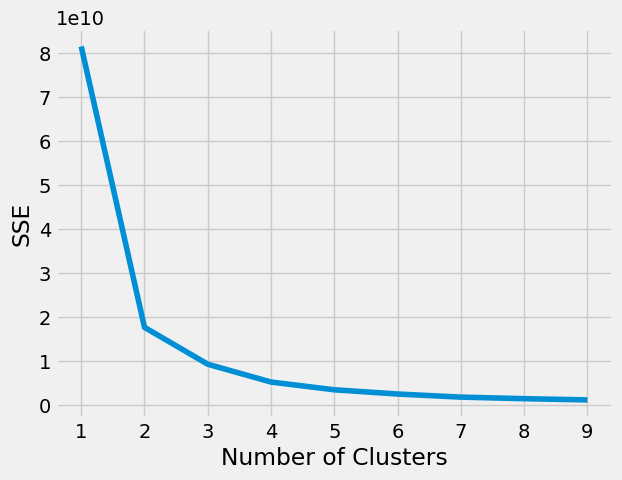

In [134]:
from sklearn.cluster import KMeans

sse=[] # error
Revenue_Class = ML_df[['Next_6_Months_Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(Revenue_Class)
    Revenue_Class["clusters"] = kmeans.labels_  #cluster names corresponding to recency values
    sse.append(kmeans.inertia_) #sse corresponding to clusters
plt.style.use("fivethirtyeight")
plt.plot(range(1, 10), sse)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [135]:
!pip install kneed

In [136]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 10), sse, curve="convex", direction="decreasing")
kl.elbow

2

In [137]:
kmeans = KMeans(n_clusters=kl.elbow)
ML_df['Revenue_Class'] = kmeans.fit_predict(ML_df[['Next_6_Months_Revenue']])

In [138]:
ML_df.Revenue_Class.value_counts()

Revenue_Class
0    3383
1     171
Name: count, dtype: int64

In [139]:
RClsses = ML_df.groupby('Revenue_Class')['Next_6_Months_Revenue'].max().to_frame()
RClsses.sort_values(by='Next_6_Months_Revenue')

Next_6_Months_Revenue
Revenue_Class                       
0                          10721.460
1                          49173.372

In [140]:
RClsses = ML_df.groupby('Revenue_Class')['Next_6_Months_Revenue'].min().to_frame()
RClsses.sort_values(by='Next_6_Months_Revenue')

Next_6_Months_Revenue
Revenue_Class                       
0                              2.290
1                          11258.706

In [141]:
ML_df

CustomerID  Frequency  Recency    T  MonetaryValue  \
0          11001          0      0.0  377       0.000000   
1          11012          0      0.0  318       0.000000   
2          11013          0      0.0  290       0.000000   
3          11017          0      0.0  392       0.000000   
4          11018          0      0.0  377       0.000000   
...          ...        ...      ...  ...            ...   
3549       30114          6    549.0  761    1467.610783   
3550       30115          6    549.0  730    1259.416450   
3551       30116          2    184.0  396   16569.189000   
3552       30117          8    730.0  911   24829.444362   
3553       30118          5    456.0  699   13379.675100   

      Next_6_Months_Revenue  Adjusted_Revenue  Revenue_Class  
0                   588.960          206.1360              0  
1                     6.280            2.1980              0  
2                    74.980           26.2430              0  
3                   742.350          259.8225              0  
4                   791.320          276.9620              0  
...                     ...               ...            ...  
3549                569.172          199.2102              0  
3550                672.294          235.3029              0  
3551              22114.950         7740.2325              1  
3552              19085.682         6679.9887              1  
3553              21177.444         7412.1054              1  

[3554 rows x 8 columns]

In [142]:
ML_df.shape

(3554, 8)

In [143]:
from sklearn.model_selection import train_test_split
X = ML_df.drop(['Revenue_Class','Next_6_Months_Revenue', 'Adjusted_Revenue'],axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X[X.columns] = scaler.fit_transform(X[X.columns])

X.head()

CustomerID  Frequency   Recency         T  MonetaryValue
0   -1.221531  -0.400332 -0.454107 -0.506097      -0.305053
1   -1.219724  -0.400332 -0.454107 -0.798358      -0.305053
2   -1.219560  -0.400332 -0.454107 -0.937058      -0.305053
3   -1.218903  -0.400332 -0.454107 -0.431794      -0.305053
4   -1.218738  -0.400332 -0.454107 -0.506097      -0.305053

In [144]:
from sklearn.metrics import classification_report,confusion_matrix
import xgboost as xgb

y = ML_df['Revenue_Class']

#split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=56)

# XGBoost Multiclassification Model
CLV_XGB = xgb.XGBClassifier(max_depth=5, learning_rate=0.1, n_jobs=-1).fit(X_train, y_train)

print(f'Accuracy of XGB classifier on training set: {CLV_XGB.score(X_train, y_train)*100:.2f}%')
print(f'Accuracy of XGB classifier on test set: {CLV_XGB.score(X_test, y_test)*100:.2f}%')

y_pred = CLV_XGB.predict(X_test)

Accuracy of XGB classifier on training set: 99.78%
Accuracy of XGB classifier on test set: 98.03%


In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       334
           1       0.89      0.77      0.83        22

    accuracy                           0.98       356
   macro avg       0.94      0.88      0.91       356
weighted avg       0.98      0.98      0.98       356



In [146]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 98.03%


#Models Evaluation

In [147]:
Models_Evaluations = pd.DataFrame({
    'Model': ['Benchmark Historical CLV', 'BG-NBD Probabilistic', 'ML XGBoost Regression', 'Deep Learning Linear'],
    'RMSE' : [RMSE_benchmark.round(2), RMSE_BGF_GGF.round(2), RMSE_ML.round(2), RMSE_DL.round(2)]})
Models_Evaluations.sort_values(by='RMSE', inplace=True)
Models_Evaluations

Model     RMSE
3      Deep Learning Linear     5.33
2     ML XGBoost Regression   294.28
0  Benchmark Historical CLV  4406.50
1      BG-NBD Probabilistic  4464.26

<Axes: ylabel='Model'>

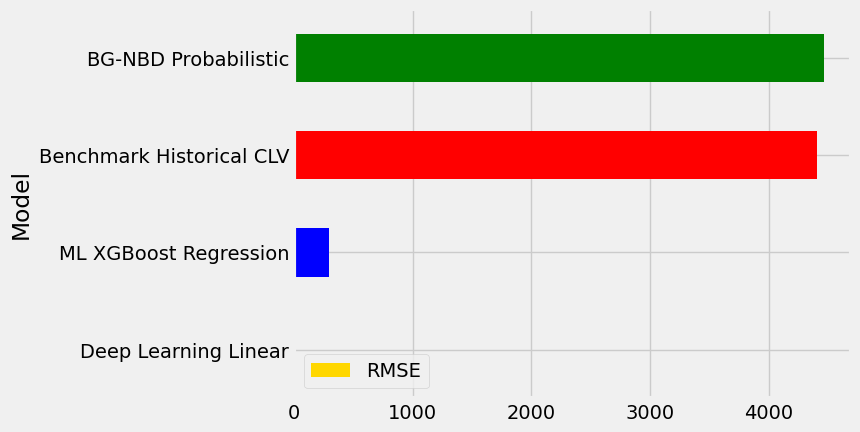

In [148]:
from itertools import cycle, islice
my_colors = list(islice(cycle(['gold', 'b', 'r', 'g', 'k', 'c']), None, len(Models_Evaluations)))
Models_Evaluations.plot.barh(x='Model', y='RMSE', color= my_colors)

The very low error for the linear deep learning model may indicate an overfitting, this can be validated/solved by having more data points.


The ML model error indicates a balanced model this also can be enhanced by providing more data to the model.


The BG-NBD errors indicate either the data is not sufficient for the model makes it under fitted or our implementation of the model is not perfect. Some potential errors with the data:
•	If Recency and T are very close.
•	If the monetary values are too similar.
•	If there is only one transaction (Frequency = 1), the model may not be able to generate a meaningful prediction, leading to NaN values.


The benchmark error represents an average performance for a simple historical model.

The classification model is fitting very well for the dominant class (Low LV) and doing good for the non-rich data class (High LV) this resulted in loss in recall that can be increased with more data points for the class (High LV).


#Results

We have successfully predicted the CLV for 3554 customers with 5 different methods, ranked by the RMSE as follows Liner Deep Learning 5.33 RMSE (a potential over fitted model), ML XGBoost Regression 294.28 RMSE (balanced model), Benchmark Historical CLV 4406.50 RMSE (simple model), and the BG-NBD Probabilistic 4464.26 RMSE (under fitted or wrong implementation), and The classification model is fitting very well for both classes with classification accuracy of 98%.


Through the EDA we found discovered that a single special offer is used 93% of the times the customers used a special offer. The sales trended to increase from the years 1-3 and dropped in the 4th years that may be resulting of only the first 6 months of the 4th year was recorded. The top customer by orders is different than the top customer by revenue with the first had over 500 orders and the second contributed over 800,000 revenue. We identified the most popular product have been ordered over 4000 times and the top selling product sold over 8000 quantities and the most revenue-generating product generated 4 million unit price.


To achieve this, we queried our data from database server with SQL resulting in acquiring 121,317 data records. We performed data pre-processing using Pandas resulting in cleaning the data from missing values, cast the data into the right format, ensured data integrity, and detect outliers. We analyzed the data by visualizing its distribution, and correlation resulting on define skewed features and highly correlated features. We summarized the data profile using Pandas profiling. We performed extensive data preparation, outliers trimming, data processing, modeling and evaluation.


# Conclusions and Future Work

Predicting the CLV is valuable to the business due its association with each customer behavior and value contribution directly. By predicting the CLV correctly it opens the door to many advanced application and use cases to the predicted metrics. One of the potential future works is to build an automated pipeline to predict the CLV for the customers periodically and automatically, some of the technology stack that could be used is Airflow, Docker, and AutoML, the future application would increase the models performance by retraining them on larger and recent data, this app could utilize the distributed computing power of apache Hadoop for batch processing.


In other hand this project can be integrated to many CRM systems and business managements systems to add the predicted CLV into account for more advanced business decision.
